In [1]:
import set_hangul

Hangul OK in your Windows !!!


### EDA 데이터 세분화 확인
- 데이터 분석 train
    - 1477 기사 중 7893개 댓글
        - index. columns name: 
        - 1. hate: 3486(no)/ 2499(of)/ 1911(hate)
            - none 3486/ not none 4410
        - 2. bias: 5148(no)/ 1516(oth)/ 1232(gen)
            - none 5148/ not none 2748
        - 3. contain_gender_bias: 1232 True / 6664 False

In [2]:
import pandas as pd

df = pd.read_csv('total_20210121.csv')

In [3]:
df.tail()

,comments,contain_gender_bias,bias,hate,title
7888,프듀출신이면 롤모델로 워너원 말했어야지 요즘 더 잘나가는 것도 워너원이고,False,others,offensive,"""'프듀2' 출신 합류"" 느와르 ""롤모델 방탄소년단""(종합)"
7889,10년차방탄팬인데 우리방탄처럼 성공은못하겠지만 일단 방탄의 부하가되고싶다는거니 이름...,False,none,offensive,"""'프듀2' 출신 합류"" 느와르 ""롤모델 방탄소년단""(종합)"
7890,"엑소는 범접할 수 없는 아이돌계의 신같은 존재라 감히 말도 못꺼내고, 그나마 방탄은...",False,none,offensive,"""'프듀2' 출신 합류"" 느와르 ""롤모델 방탄소년단""(종합)"
7891,워너원이 나와야지. .,False,none,none,"""'프듀2' 출신 합류"" 느와르 ""롤모델 방탄소년단""(종합)"
7892,방탄이 롤모델이면 엑소에 밀려 계속 2인자로 남을텐데??,False,others,offensive,"""'프듀2' 출신 합류"" 느와르 ""롤모델 방탄소년단""(종합)"


#### 순서
- 댓글 길이 확인
- 토큰 수 분포
    - 토큰: 띄어쓰기, 탭, 개행 등의 구분자로 구분된 단위
- 토큰 별 길이 평균 분포
- 명사 통계
    - mecab 사용
    - 1 글자 이상
    - 2 글자 이상
    - 3 글자 이상
- `여기까지 완료`
- 형태소 통계
- N-gram 통계
    - 2-gram 통계(형태소)
    - 3-gram 통계(형태소)
    
- 해보고 싶은 순위
    - 기사당 댓글 수
    - 기사당 hate column 분포 비율??

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
# 사용할 데이터
# df 전체 7893

# df_none : none 분류 데이터 3486
# df_not_none : hate + offensive 분류 데이터 4407

# df_hate : hate 분류 데이터 1909
# df_offensive : offensive 분류 데이터 2498

df_hate = df[df['hate'] == 'hate']
df_hate.reset_index(drop=True, inplace=True)

df_offensive = df[df['hate'] == 'offensive']
df_offensive.reset_index(drop=True, inplace=True)

df_not_none = pd.concat([df_hate, df_offensive])
df_not_none.reset_index(drop=True, inplace=True)

df_none = df[df['hate'] == 'none']
df_none.reset_index(drop=True, inplace=True)

### 1. 댓글 길이 확인

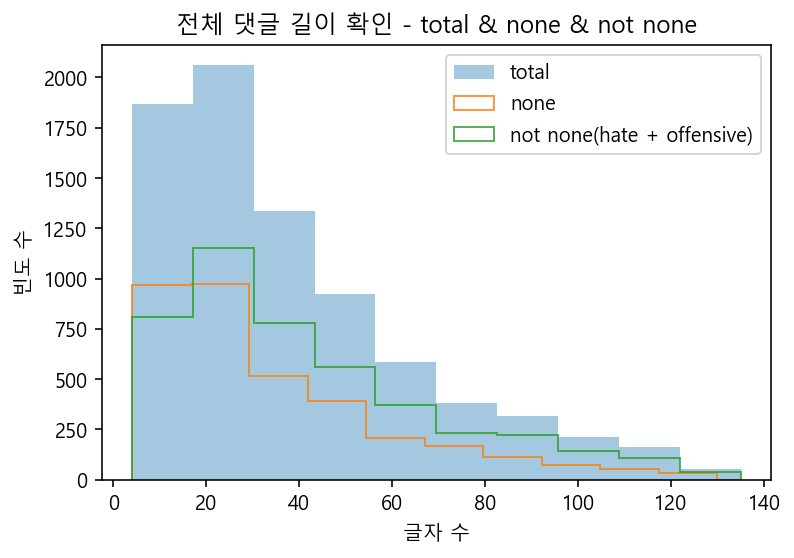

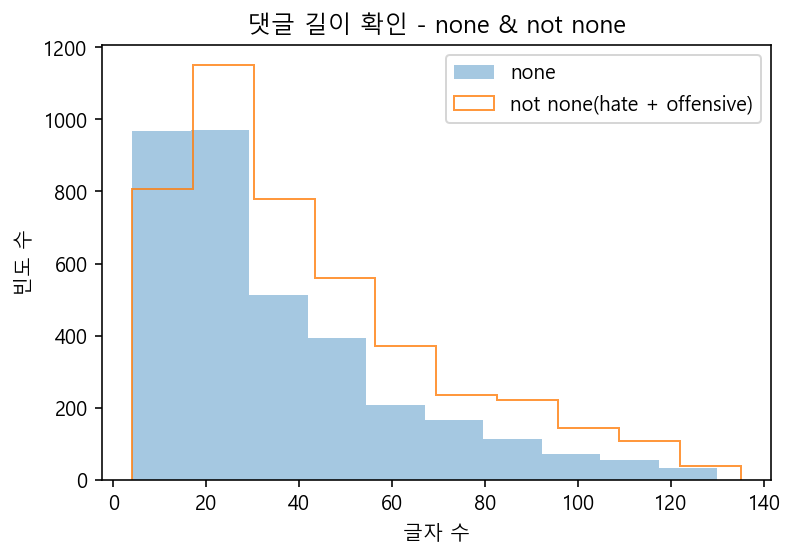

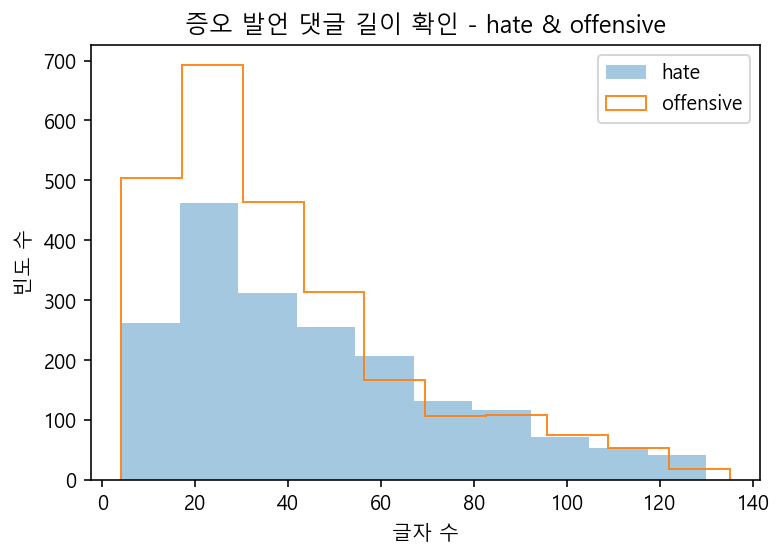

In [11]:
plt.title('전체 댓글 길이 확인 - total & none & not none')
plt.hist(df['comments'].str.len(), alpha=0.4, histtype='bar', label='total')
plt.hist(df_none['comments'].str.len(), alpha=0.8, histtype='step', label='none')
plt.hist(df_not_none['comments'].str.len(), alpha=0.8, histtype='step', label='not none(hate + offensive)')
plt.legend()
plt.xlabel('글자 수')
plt.ylabel('빈도 수')
plt.figure()

plt.title('댓글 길이 확인 - none & not none')
plt.hist(df_none['comments'].str.len(), alpha=0.4, histtype='bar', label='none')
plt.hist(df_not_none['comments'].str.len(), alpha=0.8, histtype='step', label='not none(hate + offensive)')
plt.legend()
plt.xlabel('글자 수')
plt.ylabel('빈도 수')
plt.figure()

plt.title('증오 발언 댓글 길이 확인 - hate & offensive')
plt.hist(df_hate['comments'].str.len(), alpha=0.4, histtype='bar', label='hate')
plt.hist(df_offensive['comments'].str.len(), alpha=0.9, histtype='step', label='offensive')
plt.legend()
plt.xlabel('글자 수')
plt.ylabel('빈도 수')
plt.show()

#### 정리
- 대부분 댓글은 10 ~ 40자 사이이며
- 20자 미만 글에서 증오 발언이 없는 글들이 많으나
- 그 이상 글자수의 글은 전반적으로 증오 발언이 많음

- 증언 발언 중에서 hate 보다 offensive 발언이 더 많다.

### 2. 토큰 수 분포
- 토큰: 띄어쓰기, 탭, 개행 등의 구분자로 구분된 단위

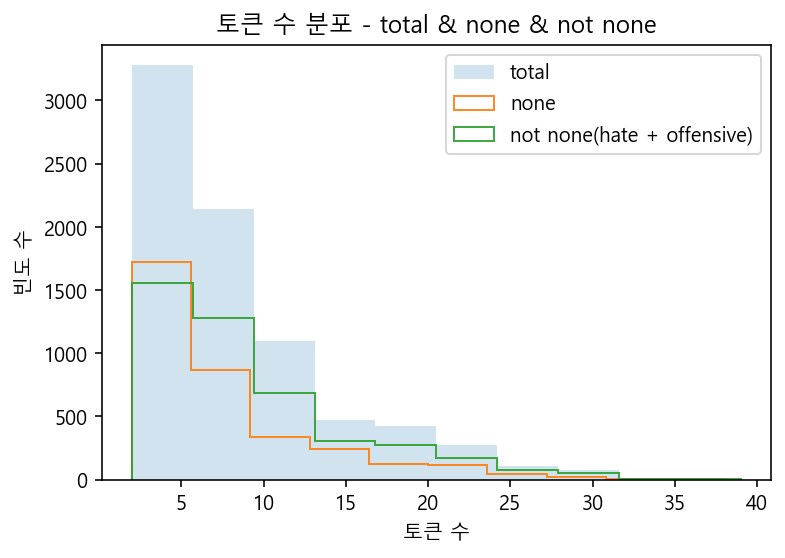

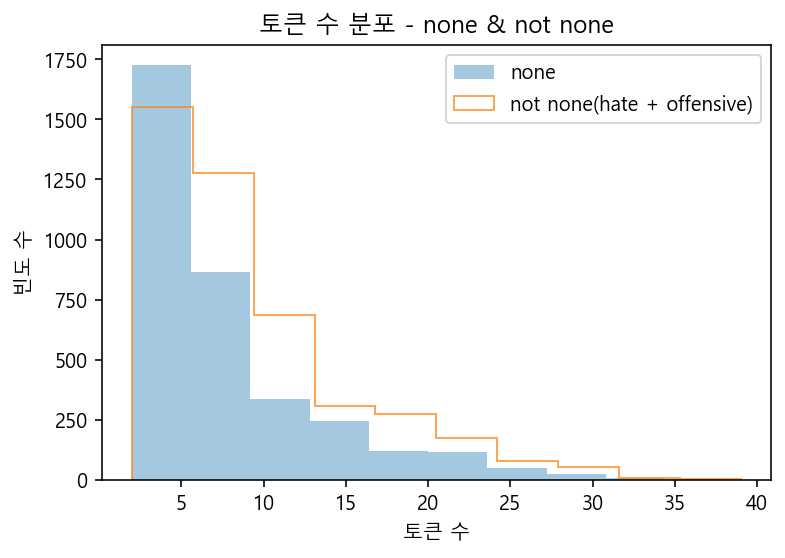

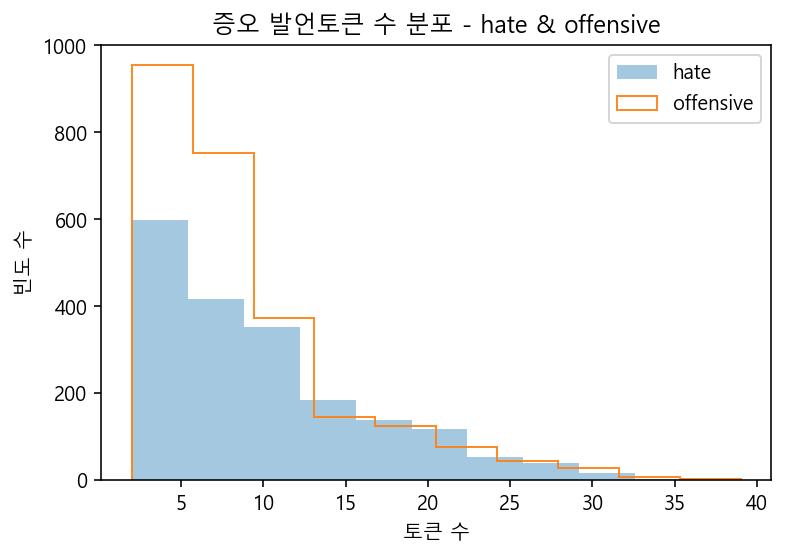

In [17]:
plt.title('토큰 수 분포 - total & none & not none')

plt.hist(df['comments'].str.split().map(lambda x: len(x)), alpha=0.2, histtype='bar', label='total')
plt.hist(df_none['comments'].str.split().map(lambda x: len(x)), alpha=0.9, histtype='step', label='none')
plt.hist(df_not_none['comments'].str.split().map(lambda x: len(x)), alpha=0.9, histtype='step', label='not none(hate + offensive)')
plt.legend()
plt.xlabel('토큰 수')
plt.ylabel('빈도 수')
plt.figure()

plt.title('토큰 수 분포 - none & not none')
plt.hist(df_none['comments'].str.split().map(lambda x: len(x)), alpha=0.4, histtype='bar', label='none')
plt.hist(df_not_none['comments'].str.split().map(lambda x: len(x)), alpha=0.7, histtype='step', label='not none(hate + offensive)')
plt.legend()
plt.xlabel('토큰 수')
plt.ylabel('빈도 수')
plt.figure()

plt.title('증오 발언토큰 수 분포 - hate & offensive')
plt.hist(df_hate['comments'].str.split().map(lambda x: len(x)), alpha=0.4, histtype='bar', label='hate')
plt.hist(df_offensive['comments'].str.split().map(lambda x: len(x)), alpha=0.9, histtype='step', label='offensive')
plt.legend()
plt.xlabel('토큰 수')
plt.ylabel('빈도 수')
plt.show()

#### 정리 1
- 대부분 댓글은 10개 미만 토큰으로 이루어져 있다.
- 띄워쓰기가 10번 미만으로 구성 되었다고 유추 가능
- 댓글 길이 표와 비슷하게 증오발언 중에서는 offensive가 10개 미만 토큰으로 이뤄진 글에서 압도적으로 많다

In [117]:
df_none['token count'] = df_none['comments'].str.split().map(lambda x: len(x))
df_none[df_none['token count'] < 5]

c:\programdata\anaconda3\envs\fc15\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,comments,contain_gender_bias,bias,hate,title,token count
1,울지마 바보야...나 정말 갠차나,False,none,none,"휘성, 오늘 부친상 비보..28일 발인",4
8,에이미.. 넘 이상한것 같음..,False,none,none,"휘성 ""사실 아냐→'브로맨쇼' 취소"" vs 에이미 ""감당할 수 있냐→글 삭제"" [종합]",4
13,결혼하고 인기급하락....왜지???,False,none,none,"황정음, ""오랜 만에 라면 머리...맘에 듬"" 셀카 근황",2
30,두자매 비호감,False,none,none,"홍진영 ""다이어트 성공한 언니 홍선영, 이젠 내 옷 입고 다녀""('해피투게더')",2
31,그냥 재밌게 봅시다,False,none,none,"홍진영 ""다이어트 성공한 언니 홍선영, 이젠 내 옷 입고 다녀""('해피투게더')",3
...,...,...,...,...,...,...
7867,단기간에? 요요 온다,False,none,none,"""29kg 감량"" 홍지민, 눈으로 확인한 3단 변화 [종합]",3
7868,흠 호란님 흥해라,False,none,none,"""21년 친구→연인으로"" '우다사' 호란♥이준혁, 최초 '♡스토리' Full 공개 ...",3
7873,기센여자랑살려면 바보가되야됨,True,gender,none,"""21년 친구→연인으로"" '우다사' 호란♥이준혁, 최초 '♡스토리' Full 공개 ...",2
7885,졸 재미없겠다~~,False,none,none,"""180cm 괴어 영접""'전설의 빅피쉬' 아마존 그랜드슬램 '대성공' (ft.뱀뱀)...",2


#### 정리 2
- 띄어쓰기가 제대로 안된 글이 많으나, 처리를 하지 않고 돌림.
- 띄어쓰기가 의미없는 줄임말이나 색다른 표현들이 있어 더 확인이 필요

- 또한 hate와 offensive, none과 not none 비교할때 둘이 같은 크기가 아니라 비교가 제대로 불가능함
    - 정규화를 해야하나?

### 3. 토큰 별 길이 평균 분포

In [14]:
t_len = pd.DataFrame()
t_len['total'] = df['comments'].str.split().apply(lambda x: [len(i) for i in x]).map(lambda x: np.mean(x))
t_len['none'] = df_none['comments'].str.split().apply(lambda x: [len(i) for i in x]).map(lambda x: np.mean(x))
t_len['not_none'] = df_not_none['comments'].str.split().apply(lambda x: [len(i) for i in x]).map(lambda x: np.mean(x))
t_len['hate'] = df_hate['comments'].str.split().apply(lambda x: [len(i) for i in x]).map(lambda x: np.mean(x))
t_len['offensive'] = df_offensive['comments'].str.split().apply(lambda x: [len(i) for i in x]).map(lambda x: np.mean(x))

t_len

,total,none,not_none,hate,offensive
0,6.000000,3.750000,6.000000,6.000000,6.000000
1,3.750000,3.285714,6.000000,6.000000,4.125000
2,4.125000,3.500000,4.333333,4.333333,4.166667
3,4.166667,3.722222,5.125000,5.125000,4.636364
4,6.000000,3.000000,3.333333,3.333333,3.714286
...,...,...,...,...,...
7888,3.555556,NaN,NaN,NaN,NaN
7889,6.714286,NaN,NaN,NaN,NaN
7890,3.000000,NaN,NaN,NaN,NaN
7891,3.333333,NaN,NaN,NaN,NaN


In [28]:
# 사용하지 않는 예시
# plt.title('토큰 별 길이 평균 분포 - total & none & not_none')
# plt.hist([t_len['total'], t_len['none'], t_len['not_none']], label=['total', 'none', 'not_none'])
# plt.legend()
# plt.xlabel('토큰 길이 평균')
# plt.ylabel('빈도 수')
# plt.show()

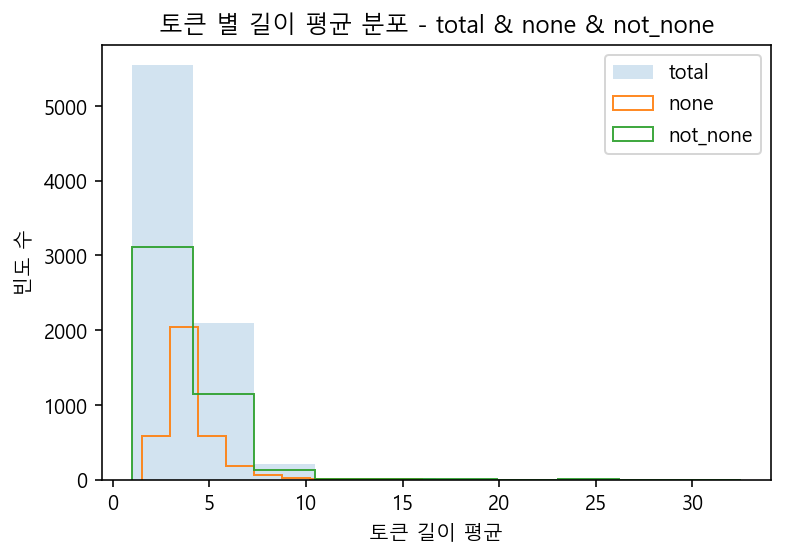

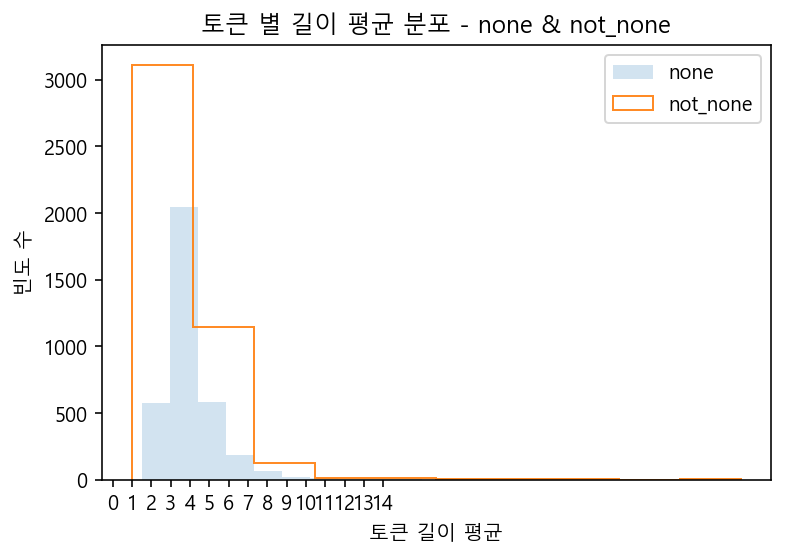

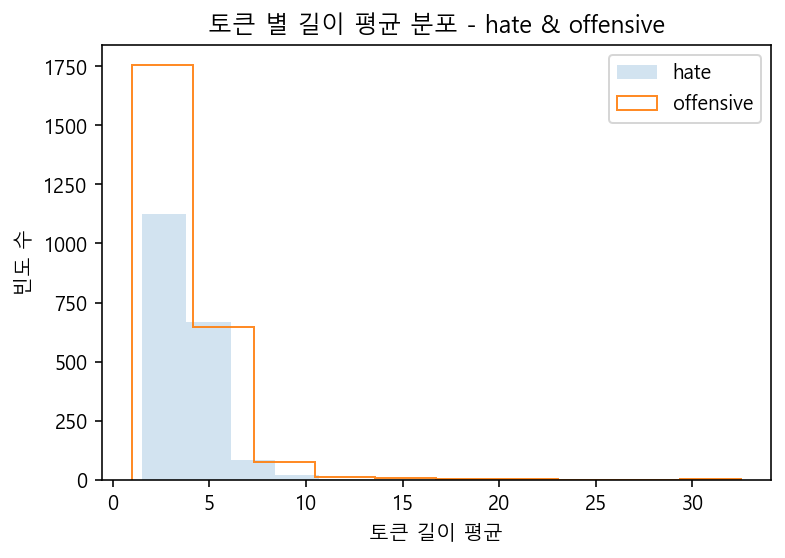

In [34]:
plt.title('토큰 별 길이 평균 분포 - total & none & not_none')
plt.hist(t_len['total'], alpha=0.2, histtype='bar', label='total')
plt.hist(t_len['none'], alpha=0.9, histtype='step', label='none')
plt.hist(t_len['not_none'], alpha=0.9, histtype='step', label='not_none')
plt.legend()
plt.xlabel('토큰 길이 평균')
plt.ylabel('빈도 수')
plt.figure()

plt.title('토큰 별 길이 평균 분포 - none & not_none')
plt.hist(t_len['none'], alpha=0.2, histtype='bar', label='none')
plt.hist(t_len['not_none'], alpha=0.9, histtype='step', label='not_none')
plt.legend()
plt.xticks(np.arange(0,15,1))
plt.xlabel('토큰 길이 평균')
plt.ylabel('빈도 수')
plt.figure()

plt.title('토큰 별 길이 평균 분포 - hate & offensive')
plt.hist(t_len['hate'], alpha=0.2, histtype='bar', label='hate')
plt.hist(t_len['offensive'], alpha=0.9, histtype='step', label='offensive')
plt.legend()
plt.xlabel('토큰 길이 평균')
plt.ylabel('빈도 수')

plt.show()

#### 정리
- 대부분 댓글은 5개 미만의 토큰(어절)들이 자주쓰임
- none은 3~4개, not none은 5개 미만 이뤄진 토큰이 자주쓰임
- 증오발언 중에서 hate가 6개 미만, offensive가 5개 미만 토큰이 자주쓰임


### 4. 명사 통계
- 형태소 분석기 mecab을 사용
- 1 글자 이상
- 2 글자 이상
- 3 글자 이상

In [36]:
# 데이터 준비

from eunjeon import Mecab
import collections
import seaborn as sns
import matplotlib.pyplot as plt

m = Mecab()
comments = df['comments'].to_list()
comments_none = df_none['comments'].to_list()
comments_not_none = df_not_none['comments'].to_list()
comments_hate = df_hate['comments'].to_list()
comments_offensive = df_offensive['comments'].to_list()

####  1글자 이상

In [52]:
# 1 글자 이상
def get_comments_ranking(df):
    n_corpus = []
    for c in df:
        n_corpus += m.nouns(c)

    count = collections.Counter(n_corpus)
    most = count.most_common()

    x, y = [], []
    for word, count in most[:40]:
        x.append(word)
        y.append(count)
    return x, y

In [55]:
# 각 데이터 프레임별 상위 40개 단어와 카운트 수
cr, cr_c = get_comments_ranking(comments)
cr_none, cr_none_c = get_comments_ranking(comments_none)
cr_not_none, cr_not_none_c = get_comments_ranking(comments_not_none)
cr_hate, cr_hate_c = get_comments_ranking(comments_hate)
cr_offensive, cr_offensive_c = get_comments_ranking(comments_offensive)

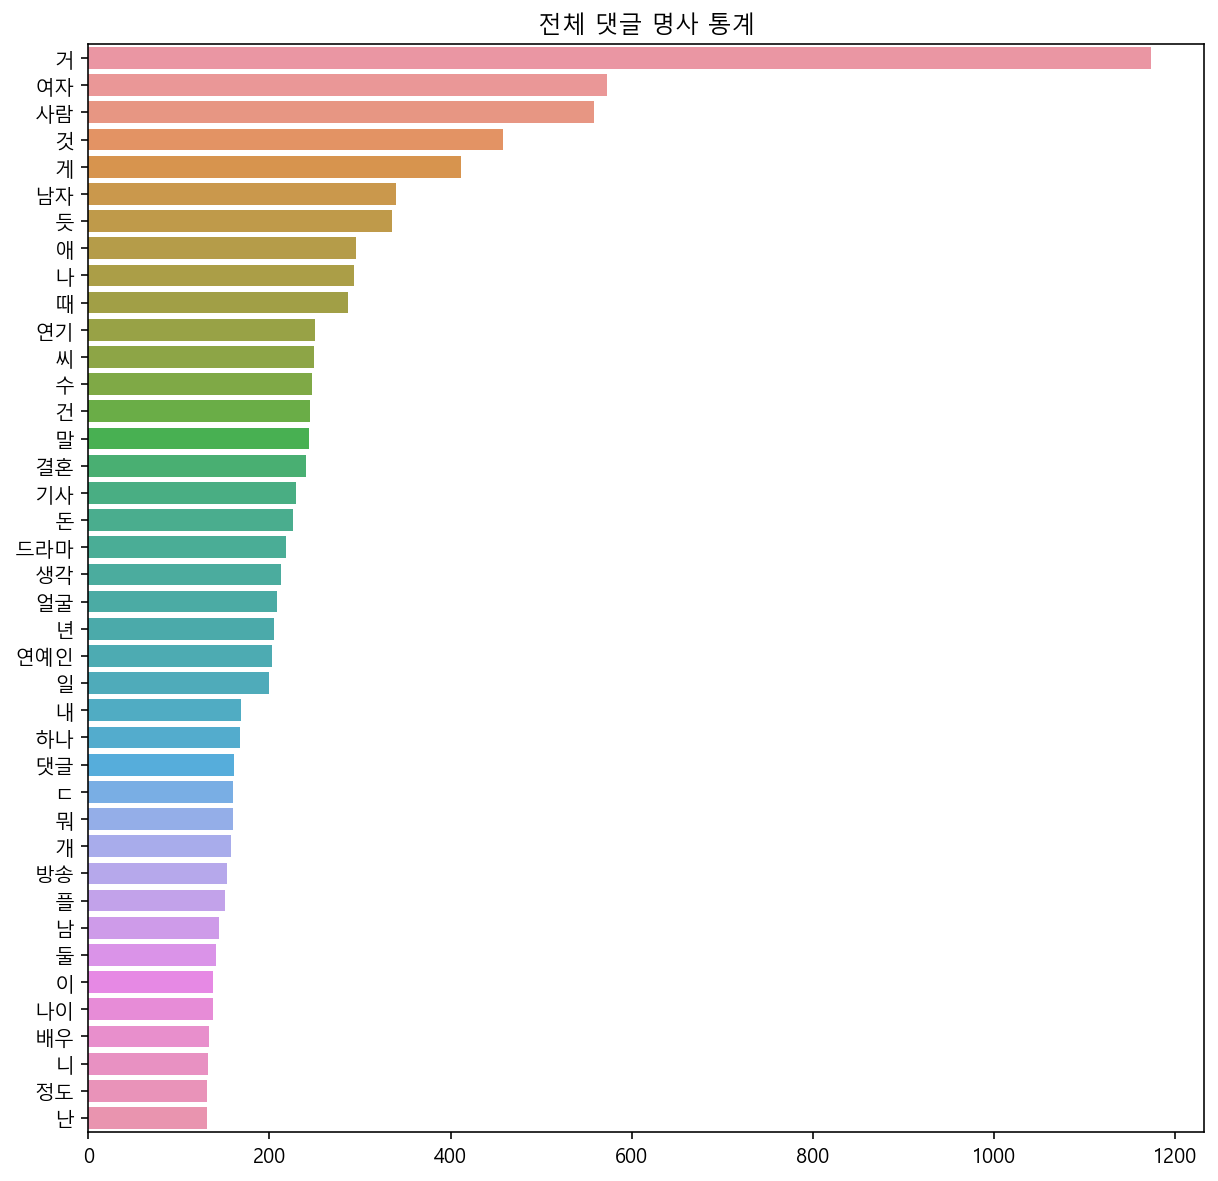

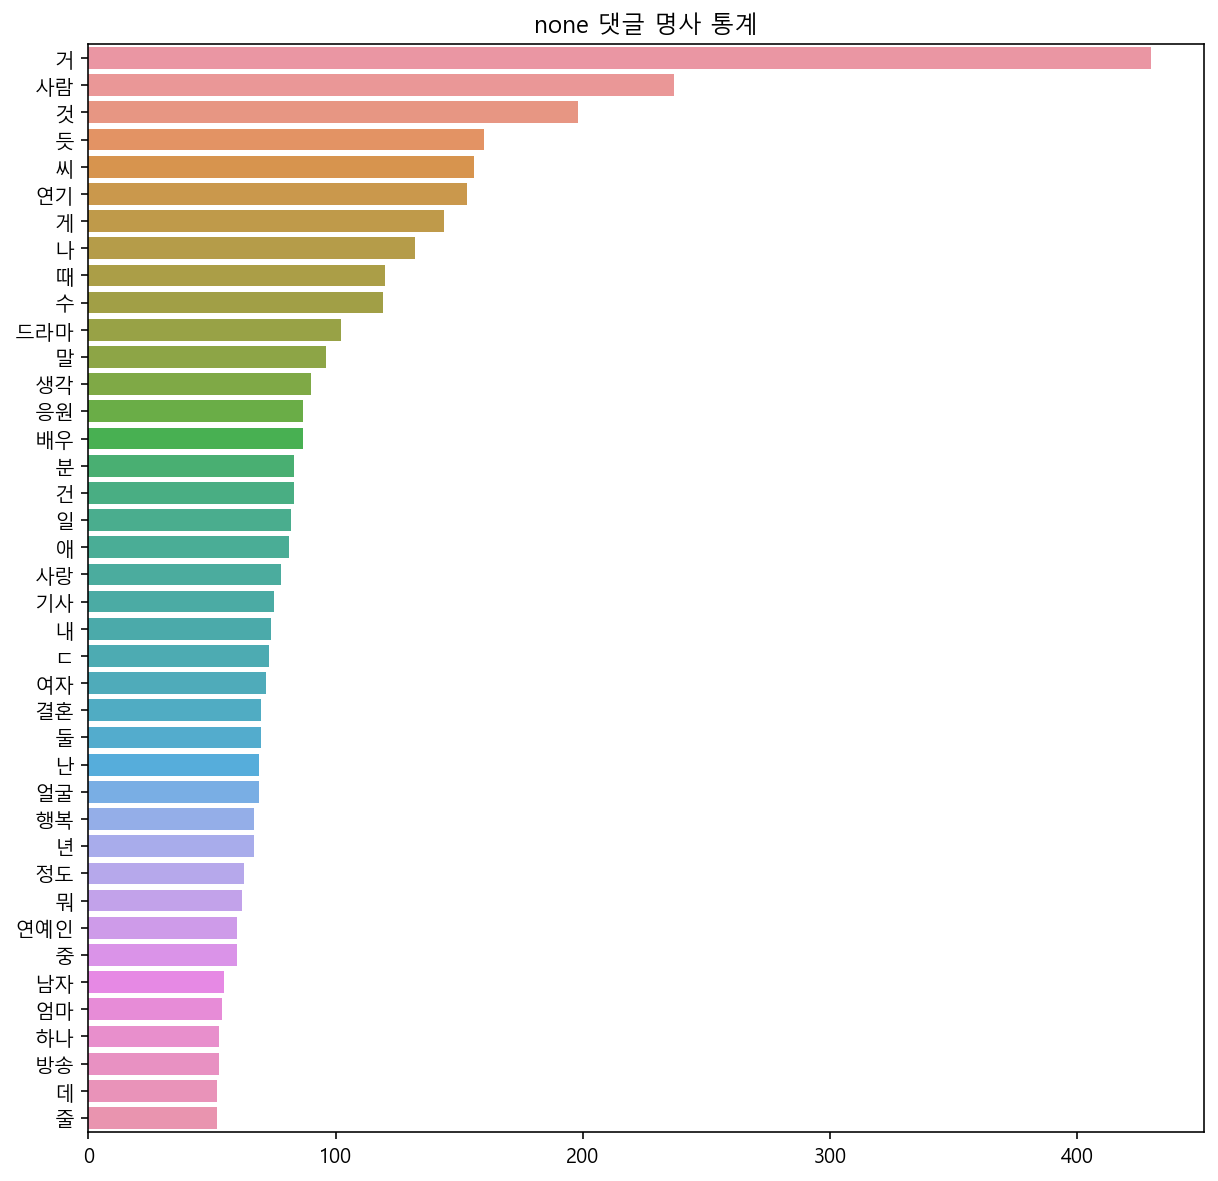

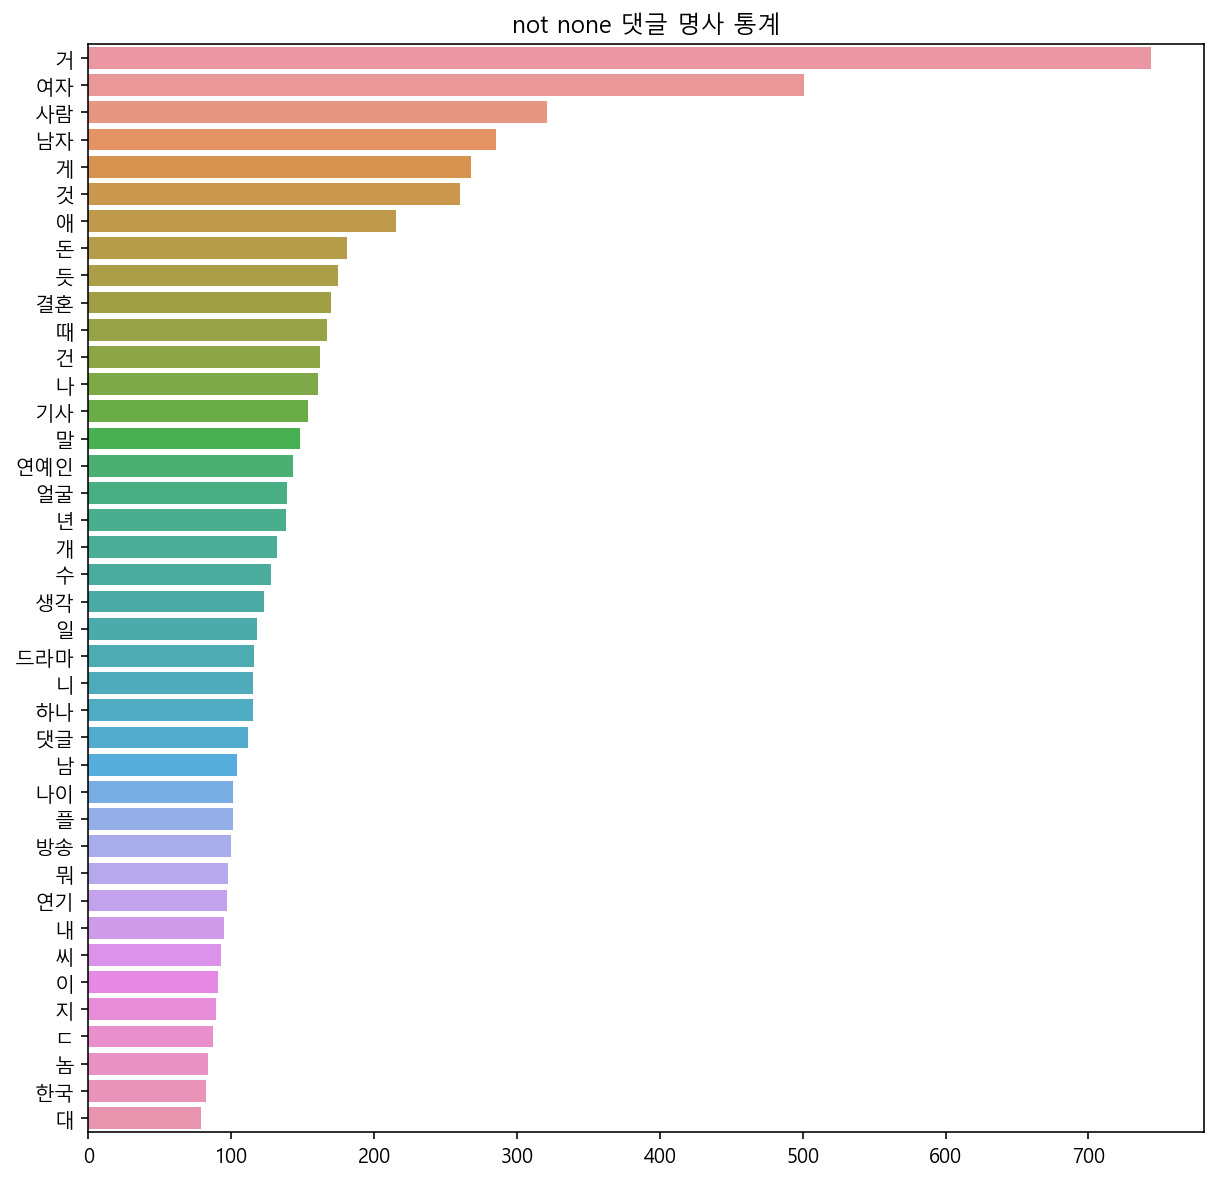

In [66]:
# total, none, not_none 순 확인
plt.figure(figsize=(10,10))
plt.title('전체 댓글 명사 통계')
sns.barplot(x=cr_c, y=cr)

plt.figure(figsize=(10,10))
plt.title('none 댓글 명사 통계')
sns.barplot(x=cr_none_c, y=cr_none)


plt.figure(figsize=(10,10))
plt.title('not none 댓글 명사 통계')
sns.barplot(x=cr_not_none_c, y=cr_not_none)
plt.show()

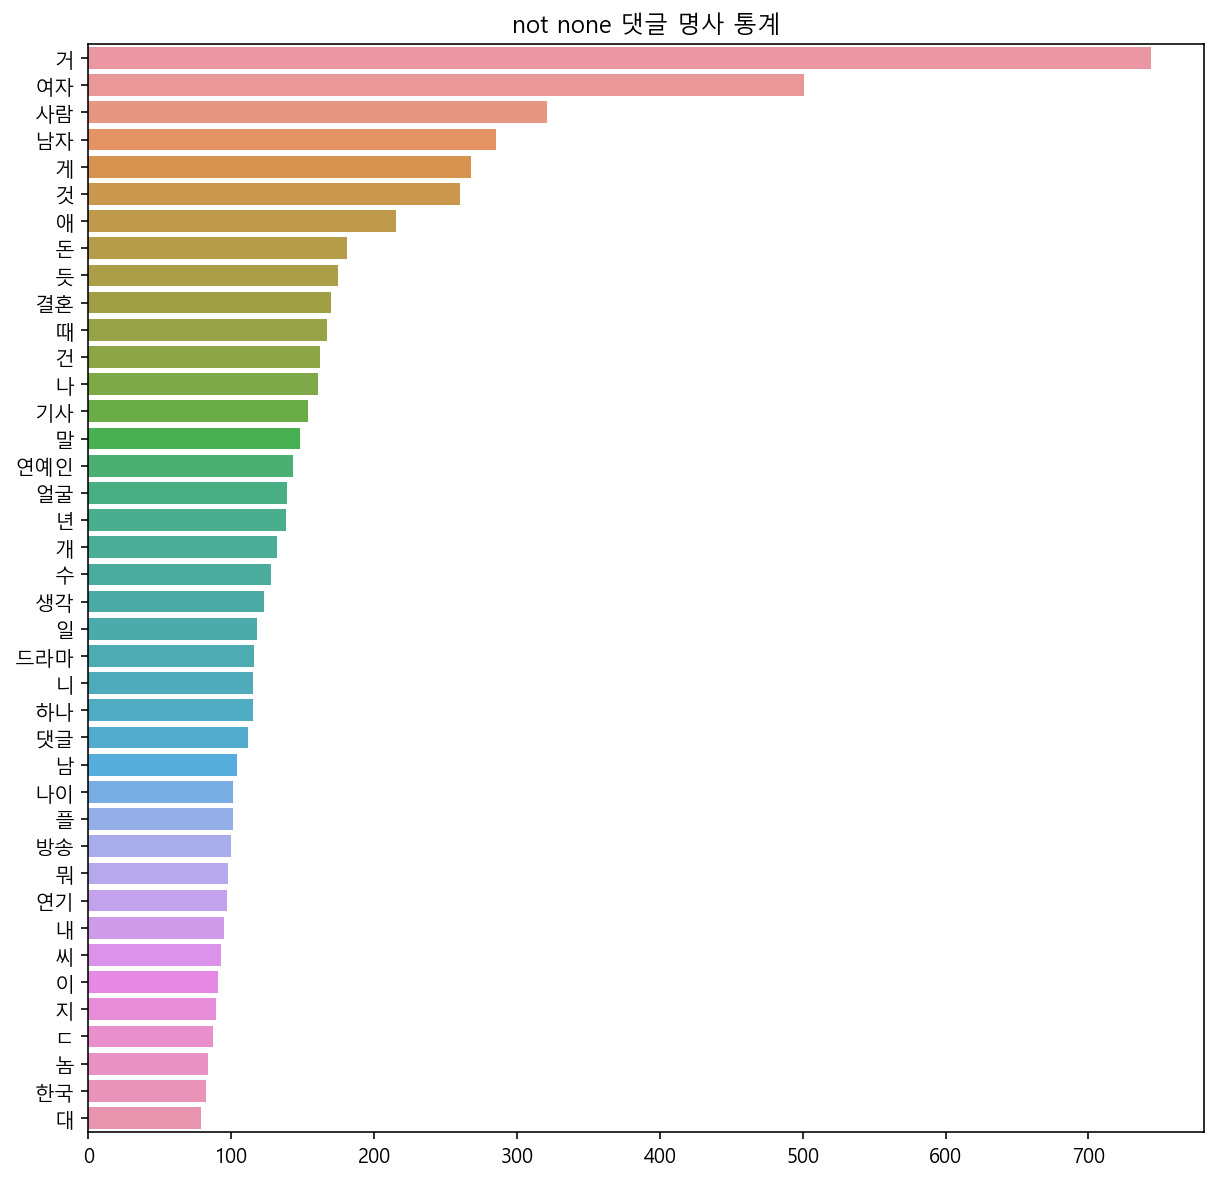

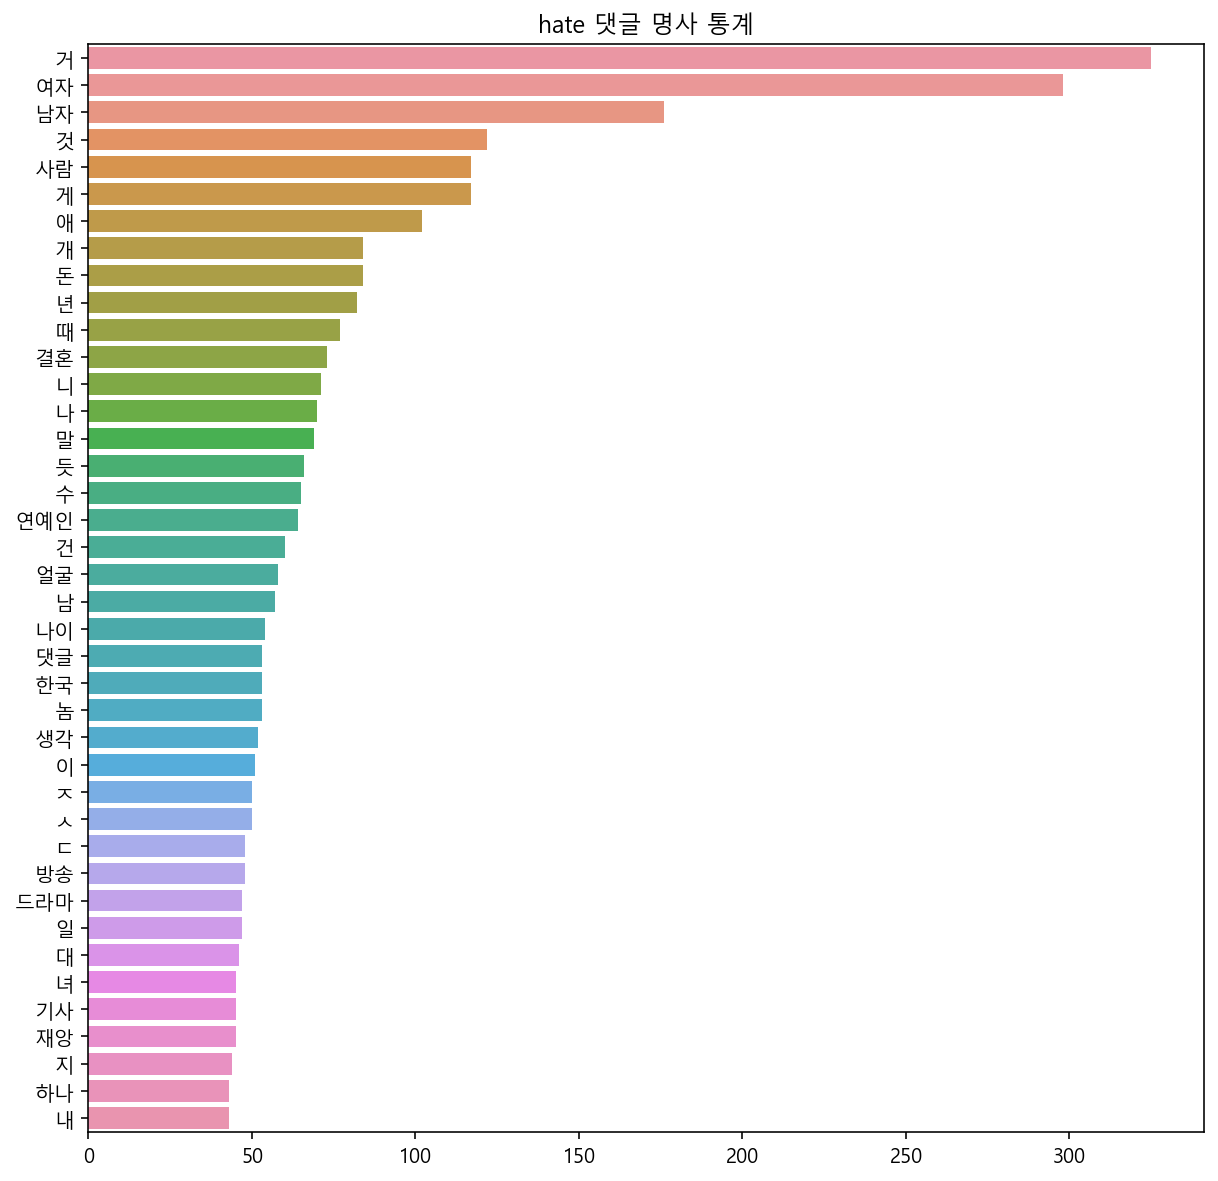

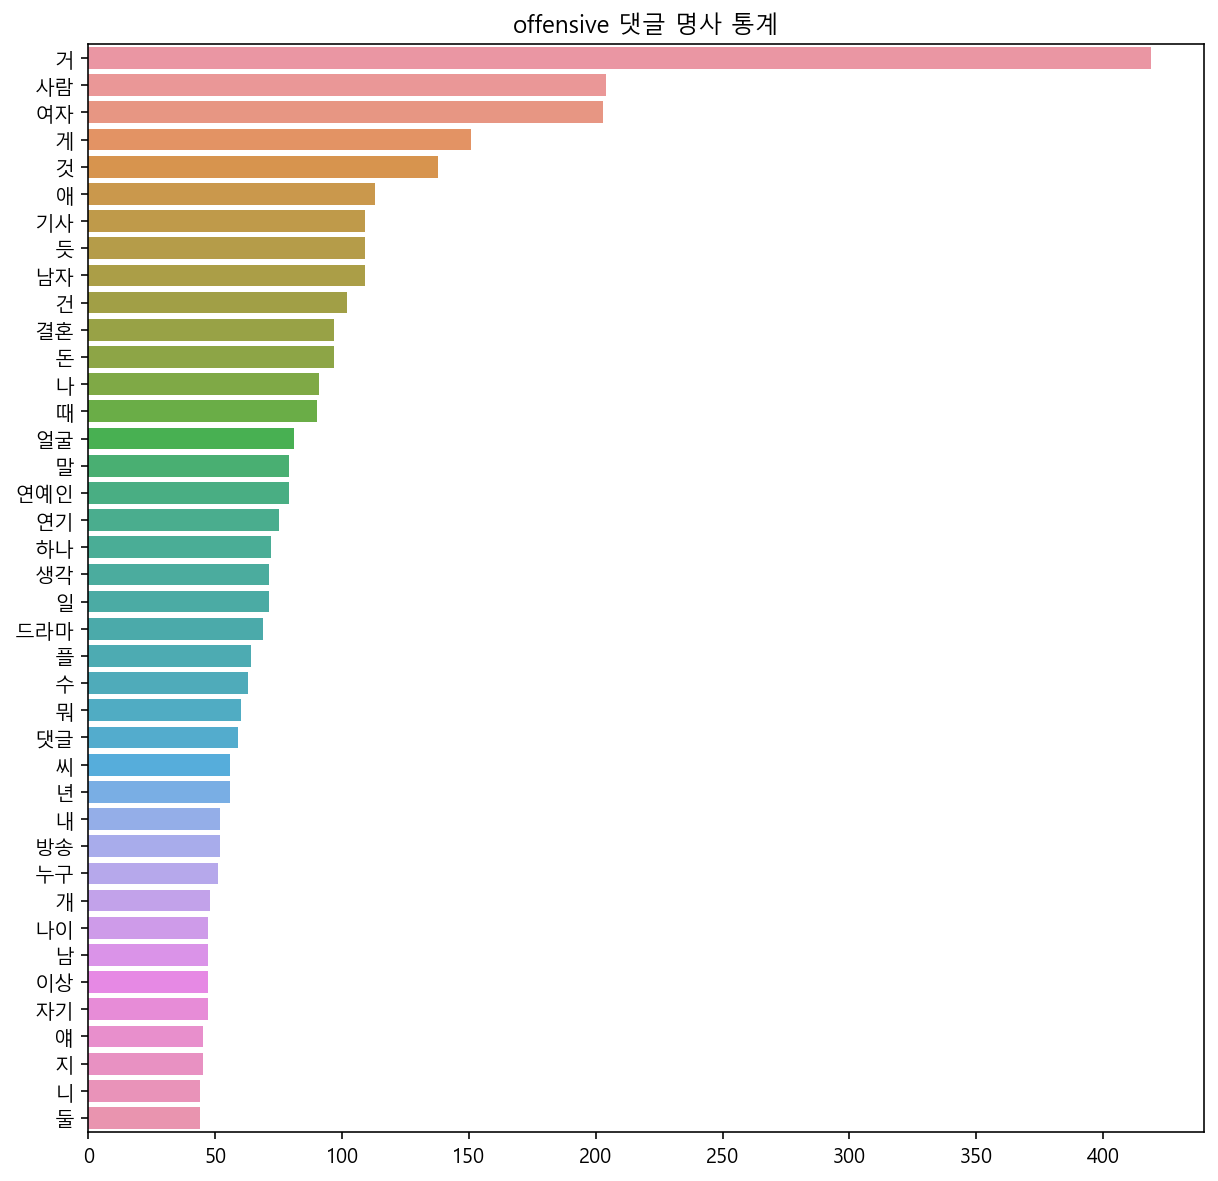

In [68]:
# 증오 댓글중 hate와 offensive 비교
plt.figure(figsize=(10,10))
plt.title('not none 댓글 명사 통계')
sns.barplot(x=cr_not_none_c, y=cr_not_none)

plt.figure(figsize=(10,10))
plt.title('hate 댓글 명사 통계')
sns.barplot(x=cr_hate_c, y=cr_hate)

plt.figure(figsize=(10,10))
plt.title('offensive 댓글 명사 통계')
sns.barplot(x=cr_offensive_c, y=cr_offensive)
plt.show()

In [70]:
# 전체 랭킹 데이터 프레임으로 비교
ranking = pd.DataFrame()

ranking['total_w'] = cr
ranking['total_c'] = cr_c
ranking['none_w'] = cr_none
ranking['none_c'] = cr_none_c
ranking['not_none_w'] = cr_not_none
ranking['not_none_c'] = cr_not_none_c
ranking['hate_w'] = cr_hate
ranking['hate_c'] = cr_hate_c
ranking['offensive_w'] = cr_offensive
ranking['offensive_c'] = cr_offensive_c

In [71]:
ranking

,total_w,total_c,none_w,none_c,not_none_w,not_none_c,hate_w,hate_c,offensive_w,offensive_c
0,거,1174,거,430,거,744,거,325,거,419
1,여자,573,사람,237,여자,501,여자,298,사람,204
2,사람,558,것,198,사람,321,남자,176,여자,203
3,것,458,듯,160,남자,285,것,122,게,151
4,게,412,씨,156,게,268,사람,117,것,138
5,남자,340,연기,153,것,260,게,117,애,113
6,듯,335,게,144,애,215,애,102,기사,109
7,애,296,나,132,돈,181,개,84,듯,109
8,나,293,때,120,듯,175,돈,84,남자,109
9,때,287,수,119,결혼,170,년,82,건,102


#### 2 글자 이상

In [83]:
def get_comments_ranking_2(df):
    n_corpus = []
    for c in df:
        for n in m.nouns(c):
            if len(n)>1:
                n_corpus.append(n)

    count = collections.Counter(n_corpus)
    most = count.most_common() # 빈도 수 순으로 추출

    x, y = [], []
    for word, count in most[:40]:
        x.append(word)
        y.append(count)
    return x, y

In [84]:
# 각 데이터 프레임별 상위 40개 단어와 카운트 수
cr, cr_c = get_comments_ranking_2(comments)
cr_none, cr_none_c = get_comments_ranking_2(comments_none)
cr_not_none, cr_not_none_c = get_comments_ranking_2(comments_not_none)
cr_hate, cr_hate_c = get_comments_ranking_2(comments_hate)
cr_offensive, cr_offensive_c = get_comments_ranking_2(comments_offensive)

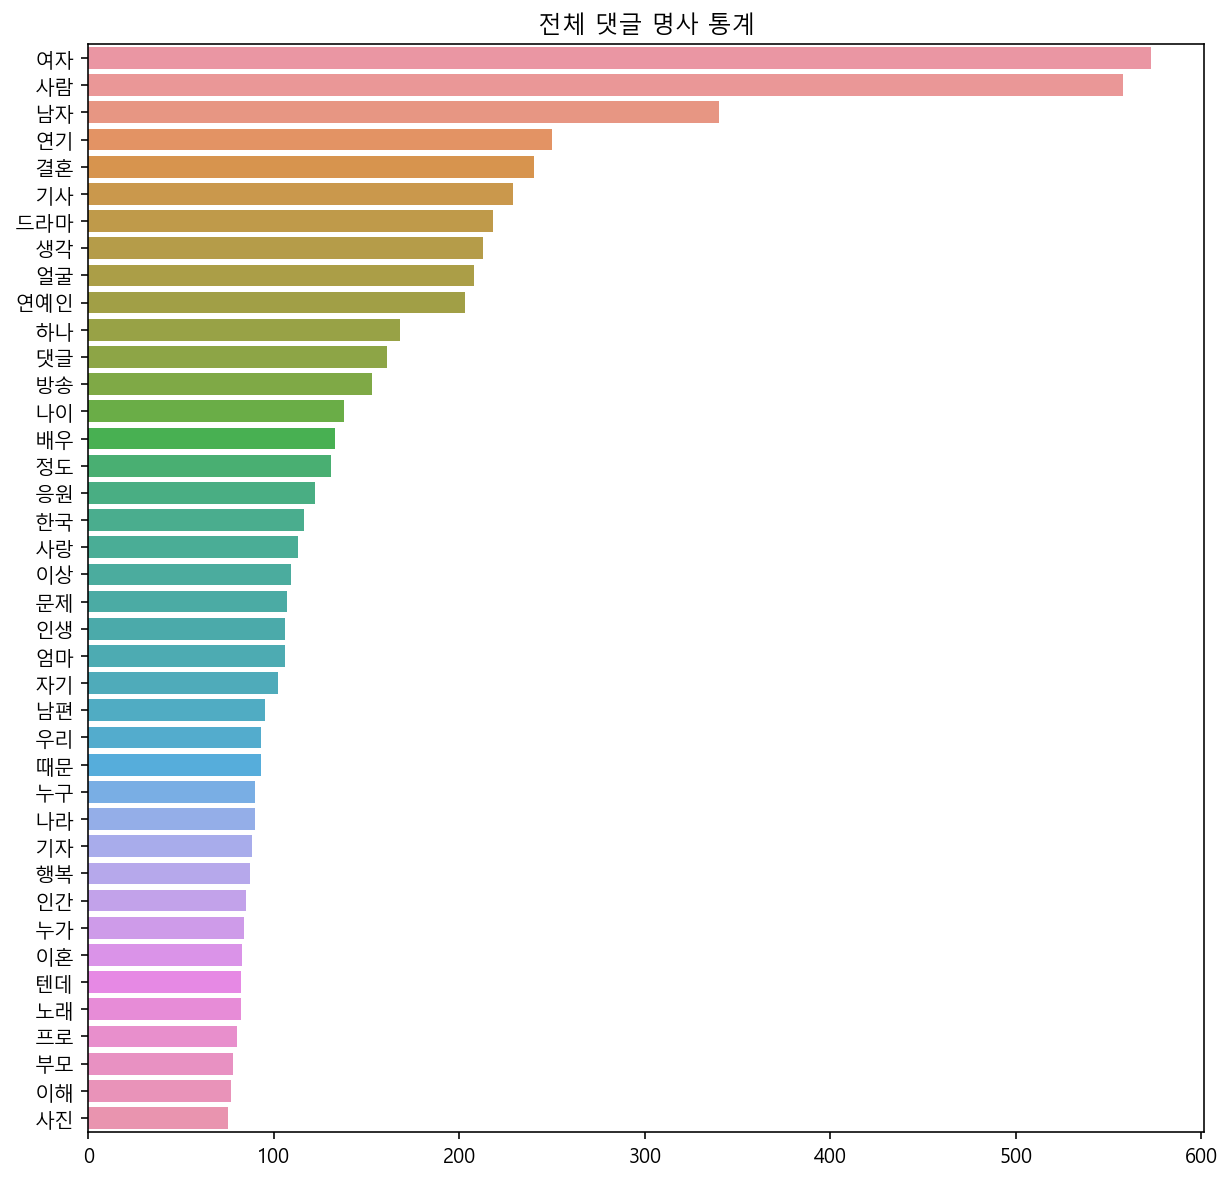

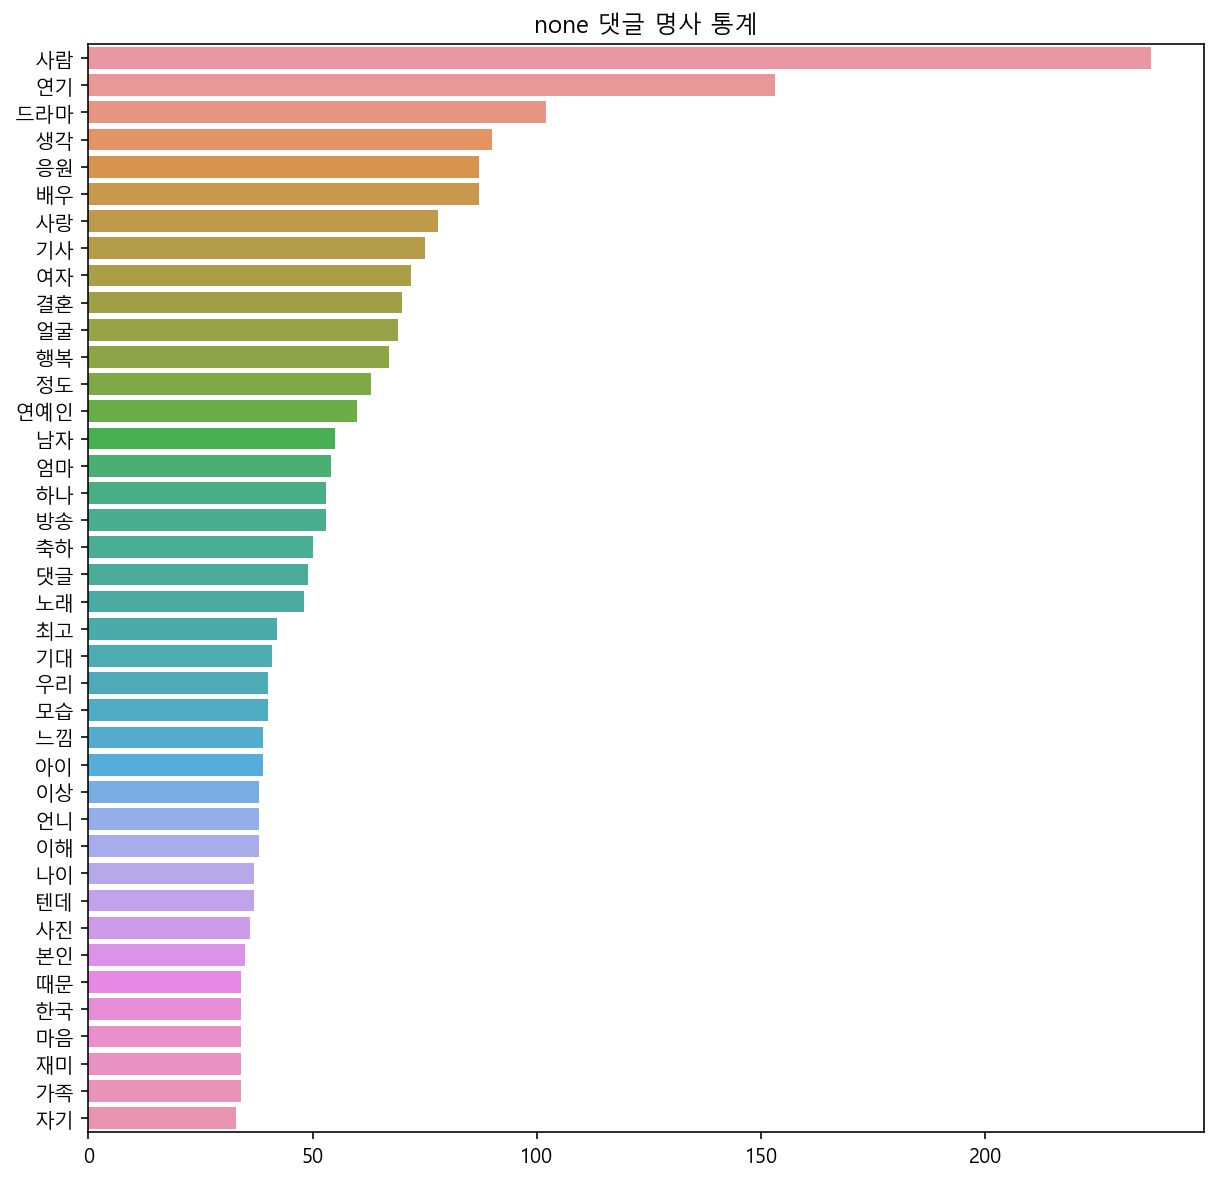

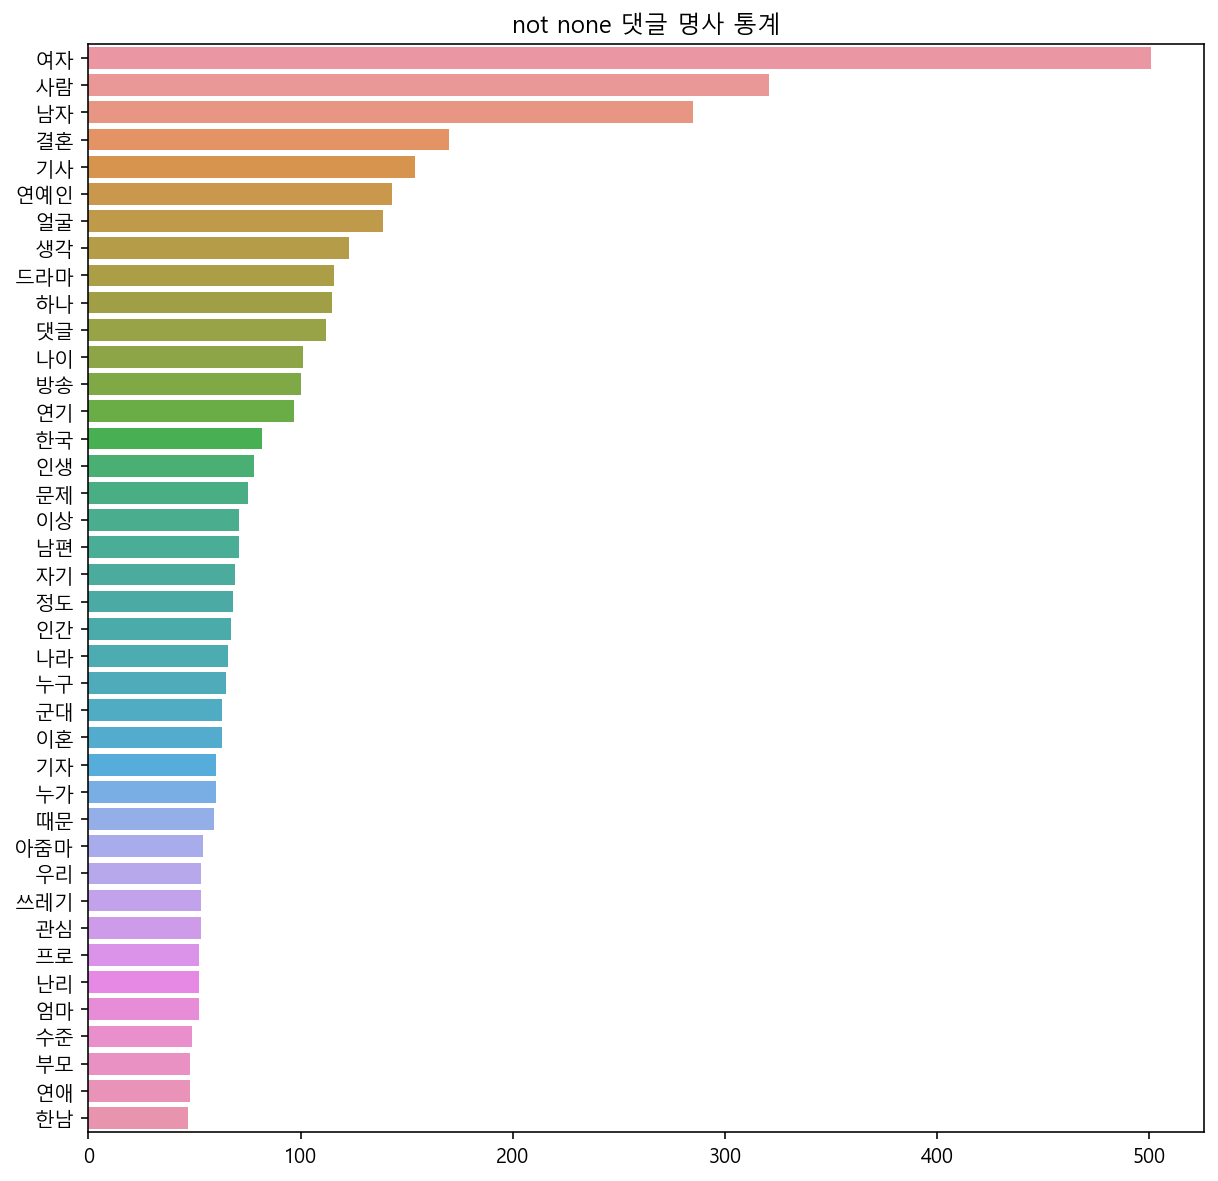

In [85]:
# total, none, not_none 순 확인
plt.figure(figsize=(10,10))
plt.title('전체 댓글 명사 통계')
sns.barplot(x=cr_c, y=cr)

plt.figure(figsize=(10,10))
plt.title('none 댓글 명사 통계')
sns.barplot(x=cr_none_c, y=cr_none)


plt.figure(figsize=(10,10))
plt.title('not none 댓글 명사 통계')
sns.barplot(x=cr_not_none_c, y=cr_not_none)
plt.show()

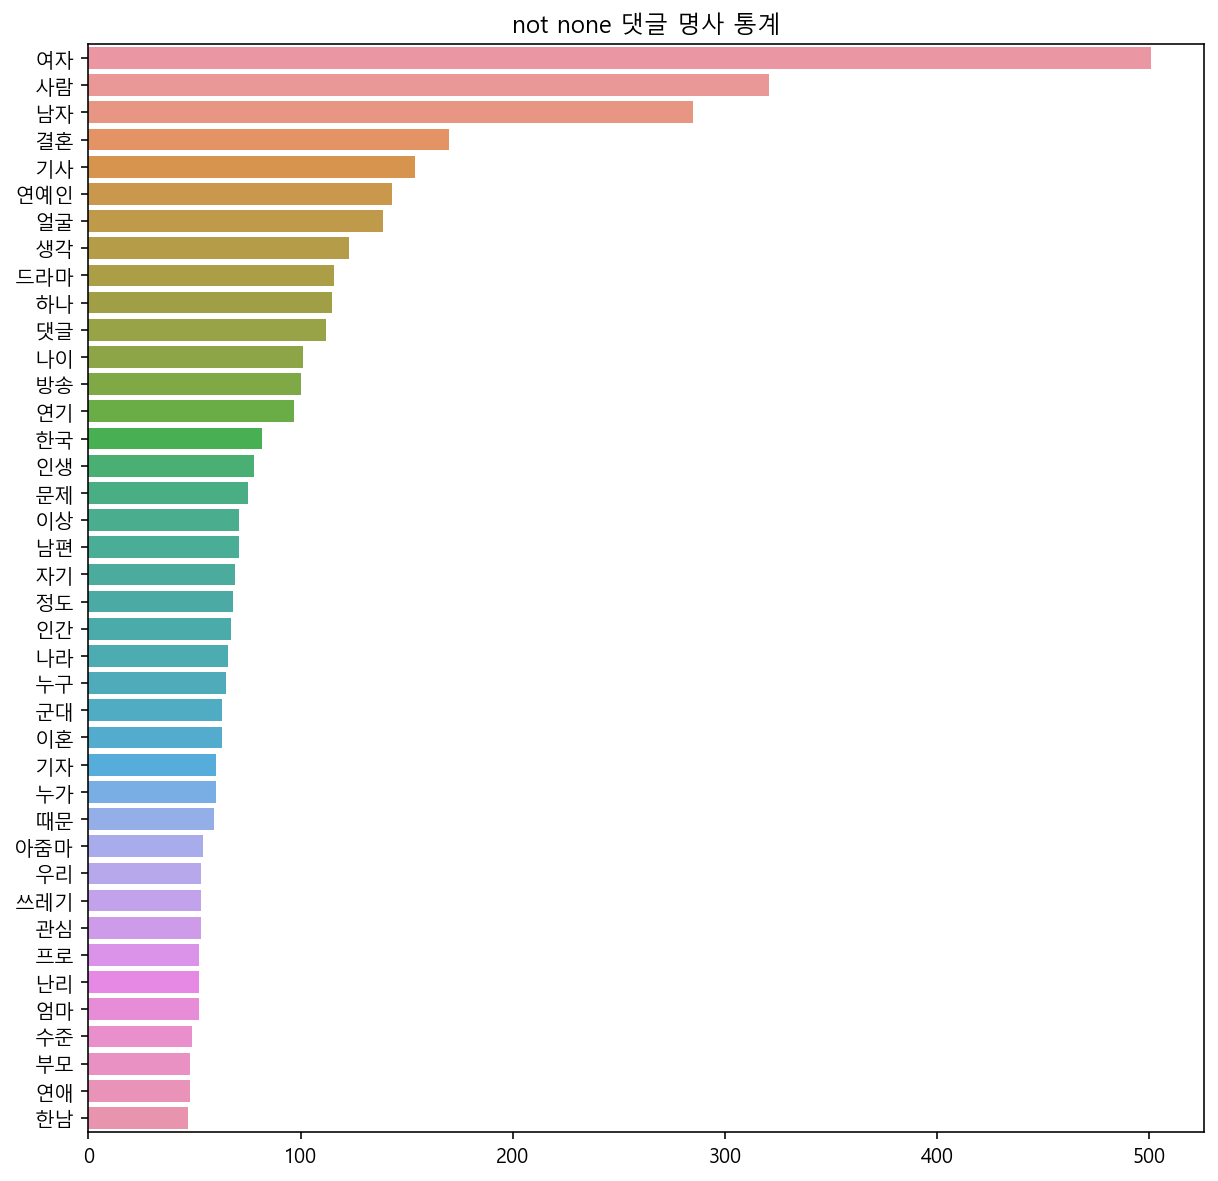

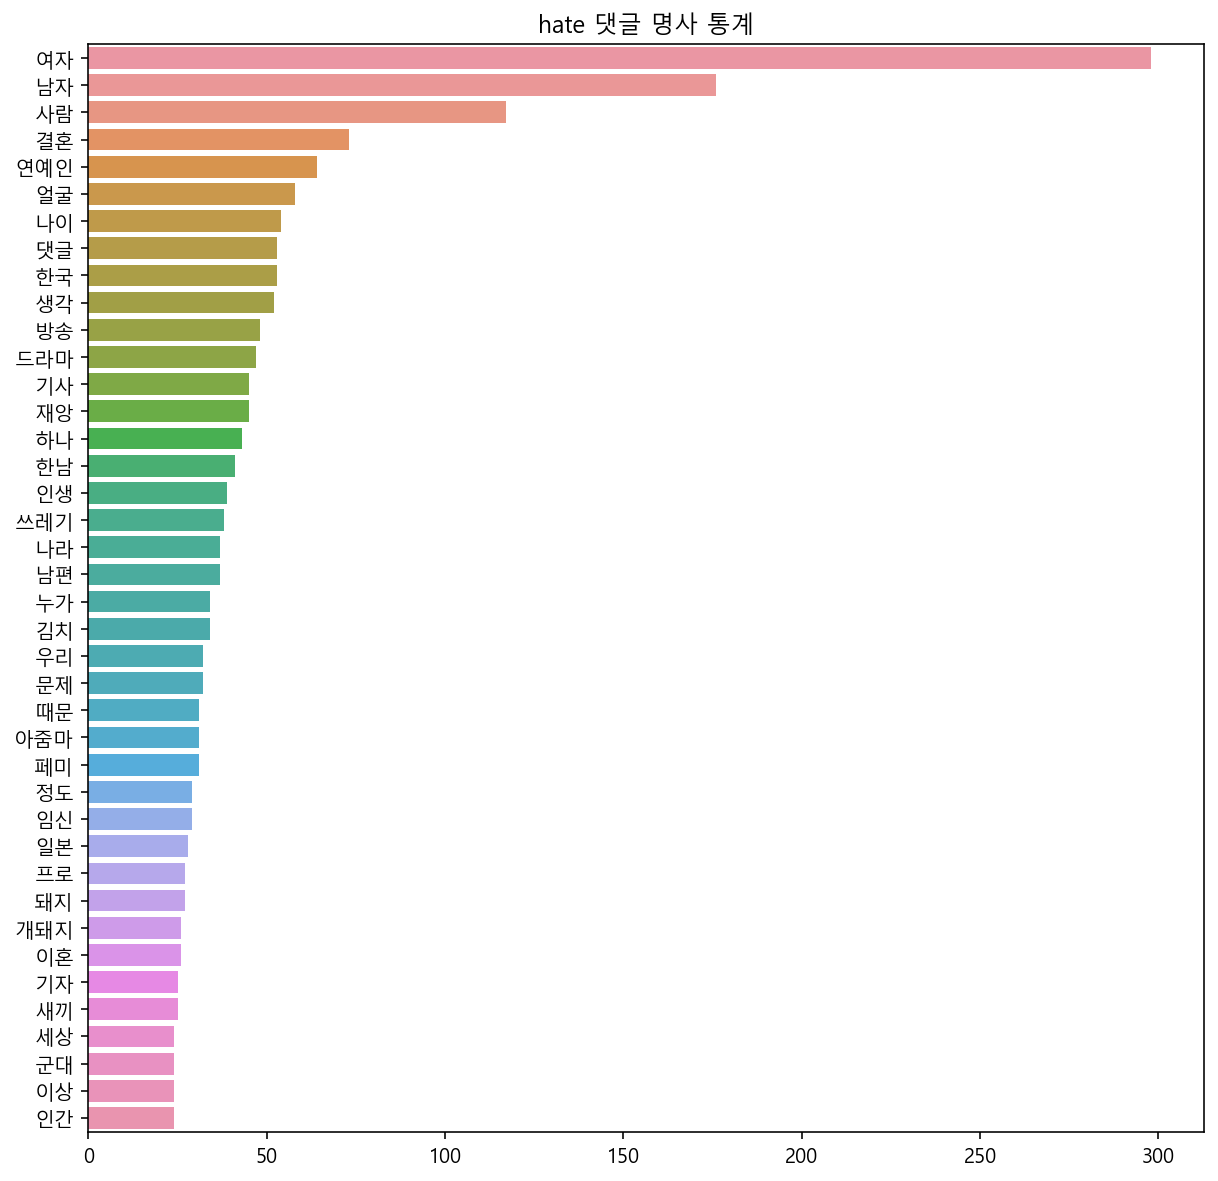

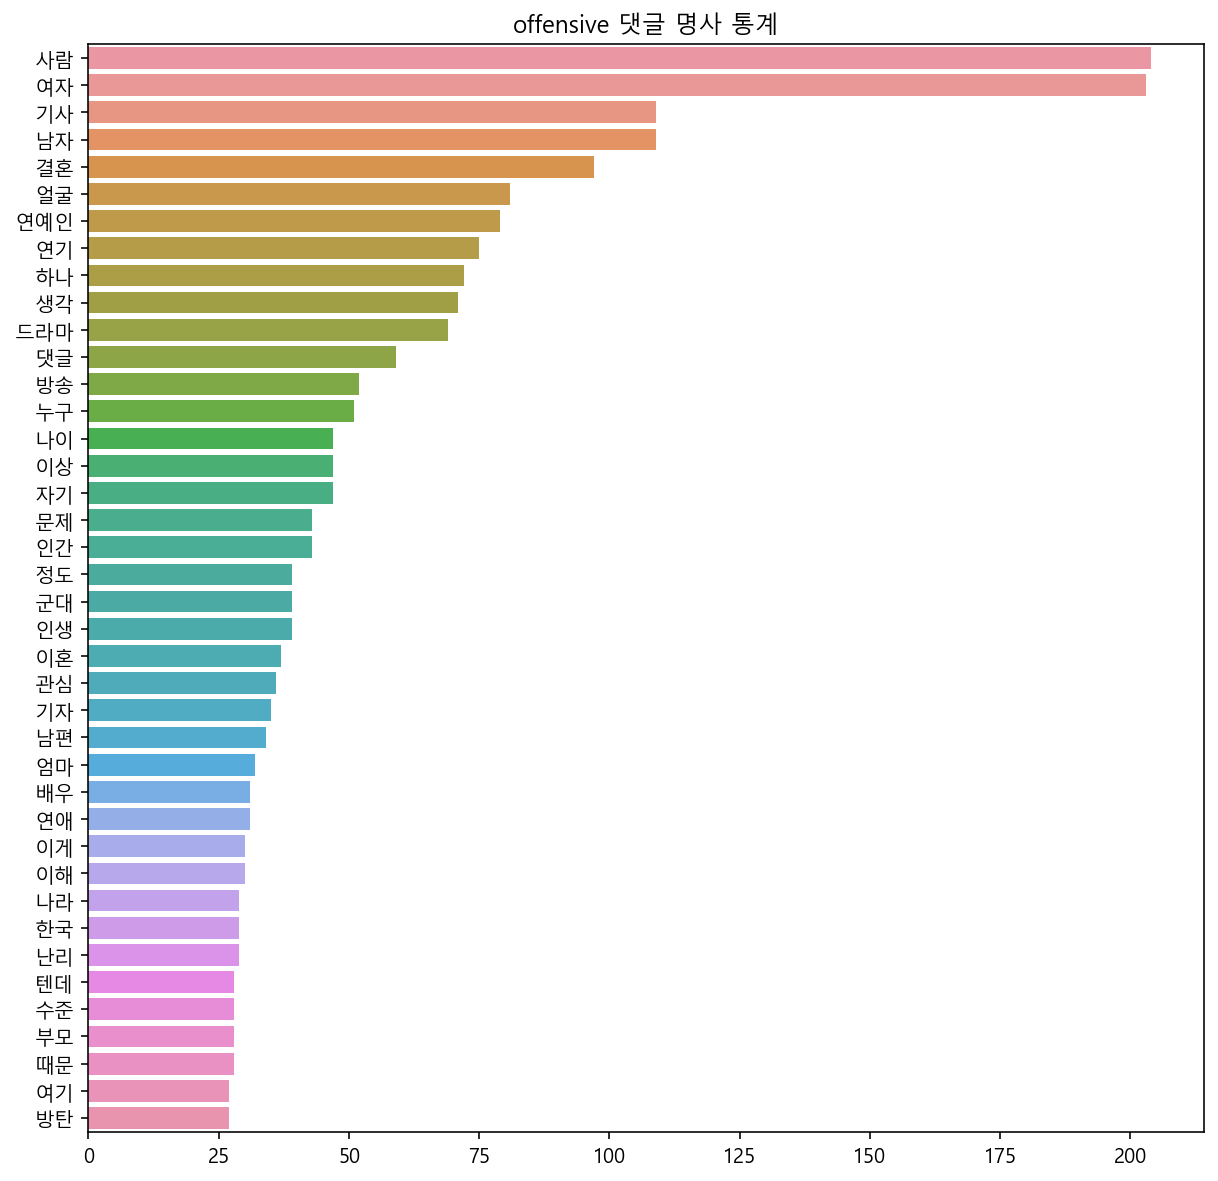

In [75]:
# 증오 댓글중 hate와 offensive 비교
plt.figure(figsize=(10,10))
plt.title('not none 댓글 명사 통계')
sns.barplot(x=cr_not_none_c, y=cr_not_none)

plt.figure(figsize=(10,10))
plt.title('hate 댓글 명사 통계')
sns.barplot(x=cr_hate_c, y=cr_hate)

plt.figure(figsize=(10,10))
plt.title('offensive 댓글 명사 통계')
sns.barplot(x=cr_offensive_c, y=cr_offensive)
plt.show()

In [86]:
ranking = pd.DataFrame()

ranking['total_w'] = cr
ranking['total_c'] = cr_c
ranking['none_w'] = cr_none
ranking['none_c'] = cr_none_c
ranking['not_none_w'] = cr_not_none
ranking['not_none_c'] = cr_not_none_c
ranking['hate_w'] = cr_hate
ranking['hate_c'] = cr_hate_c
ranking['offensive_w'] = cr_offensive
ranking['offensive_c'] = cr_offensive_c

ranking

,total_w,total_c,none_w,none_c,not_none_w,not_none_c,hate_w,hate_c,offensive_w,offensive_c
0,여자,573,사람,237,여자,501,여자,298,사람,204
1,사람,558,연기,153,사람,321,남자,176,여자,203
2,남자,340,드라마,102,남자,285,사람,117,기사,109
3,연기,250,생각,90,결혼,170,결혼,73,남자,109
4,결혼,240,응원,87,기사,154,연예인,64,결혼,97
5,기사,229,배우,87,연예인,143,얼굴,58,얼굴,81
6,드라마,218,사랑,78,얼굴,139,나이,54,연예인,79
7,생각,213,기사,75,생각,123,댓글,53,연기,75
8,얼굴,208,여자,72,드라마,116,한국,53,하나,72
9,연예인,203,결혼,70,하나,115,생각,52,생각,71


#### 3글자

In [87]:
def get_comments_ranking_3(df):
    n_corpus = []
    for c in df:
        for n in m.nouns(c):
            if len(n)>2:
                n_corpus.append(n)

    count = collections.Counter(n_corpus)
    most = count.most_common() # 빈도 수 순으로 추출

    x, y = [], []
    for word, count in most[:40]:
        x.append(word)
        y.append(count)
    return x, y

In [88]:
# 각 데이터 프레임별 상위 40개 단어와 카운트 수
cr, cr_c = get_comments_ranking_3(comments)
cr_none, cr_none_c = get_comments_ranking_3(comments_none)
cr_not_none, cr_not_none_c = get_comments_ranking_3(comments_not_none)
cr_hate, cr_hate_c = get_comments_ranking_3(comments_hate)
cr_offensive, cr_offensive_c = get_comments_ranking_3(comments_offensive)

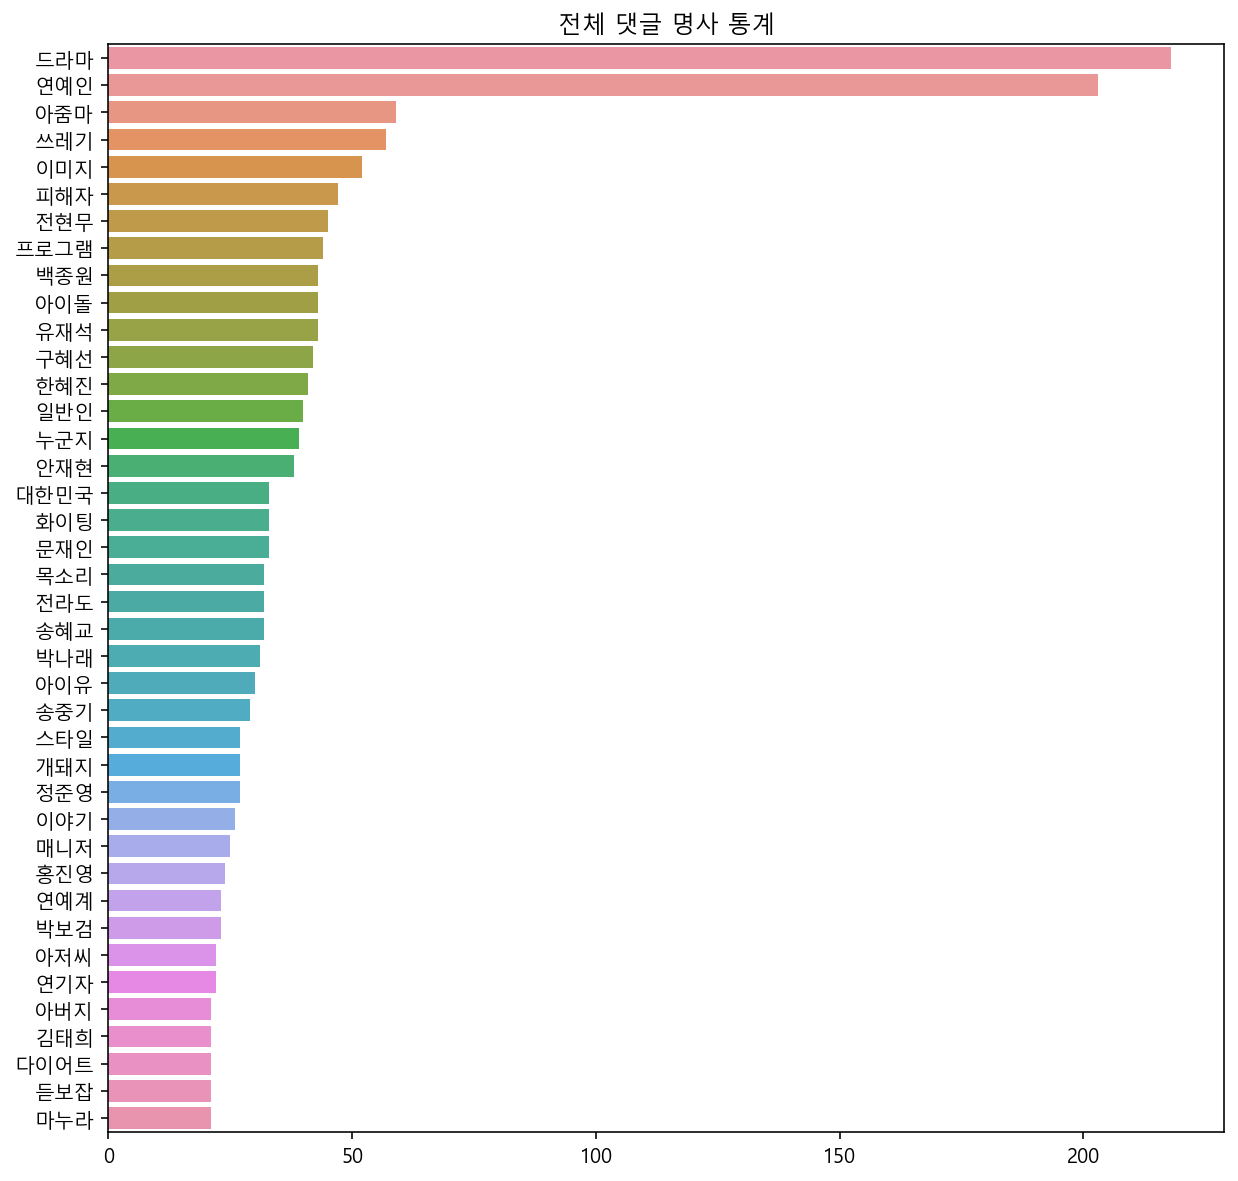

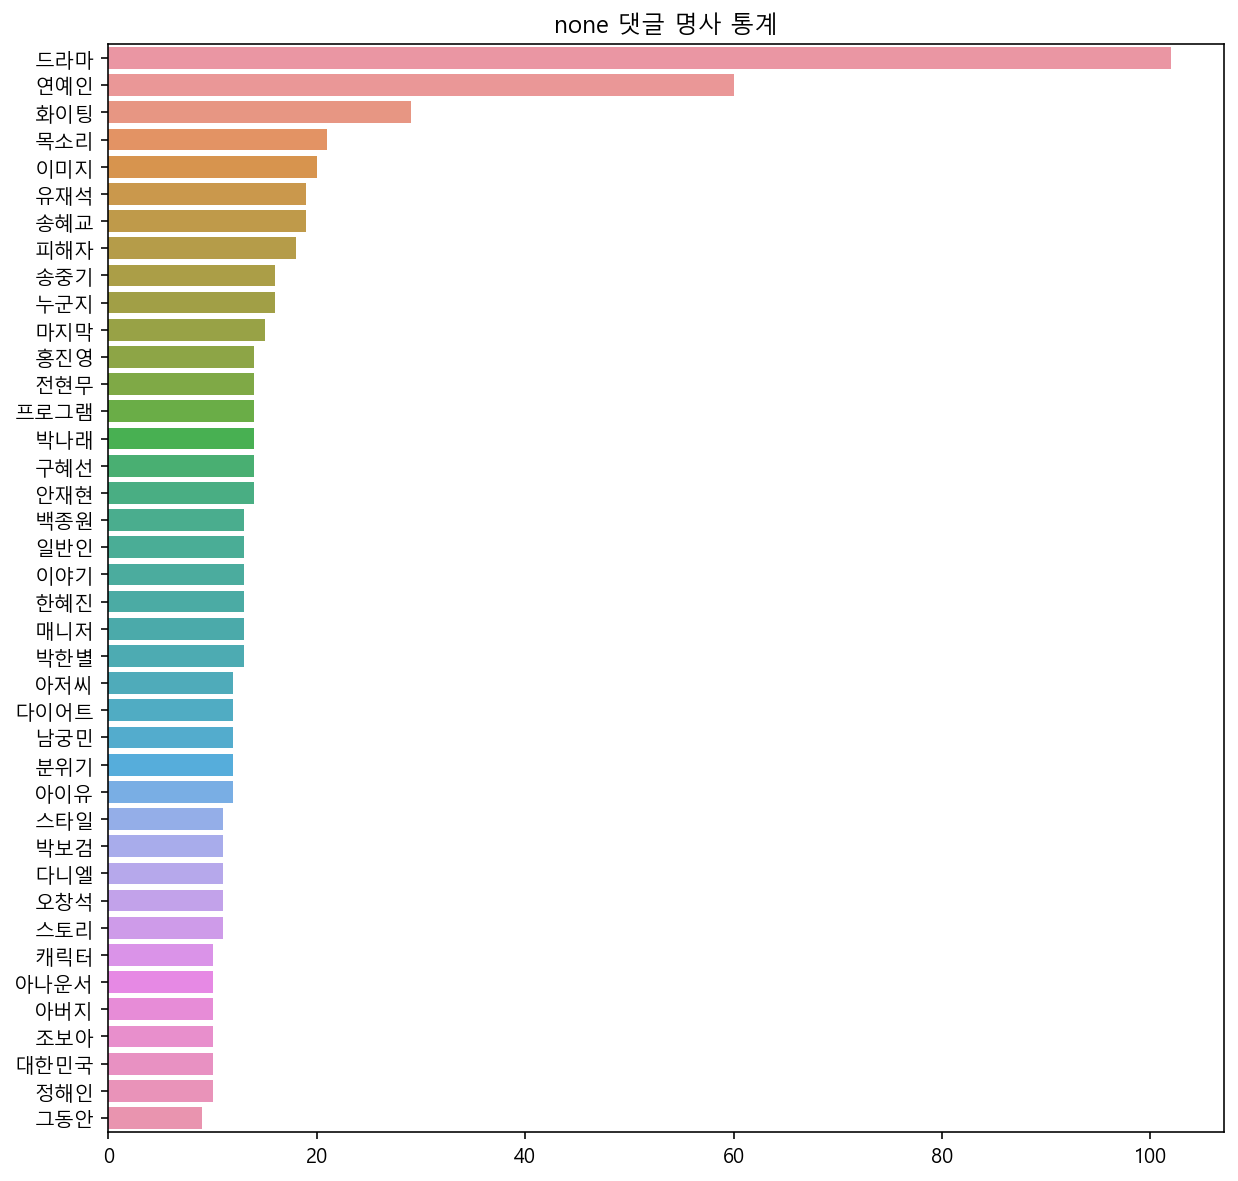

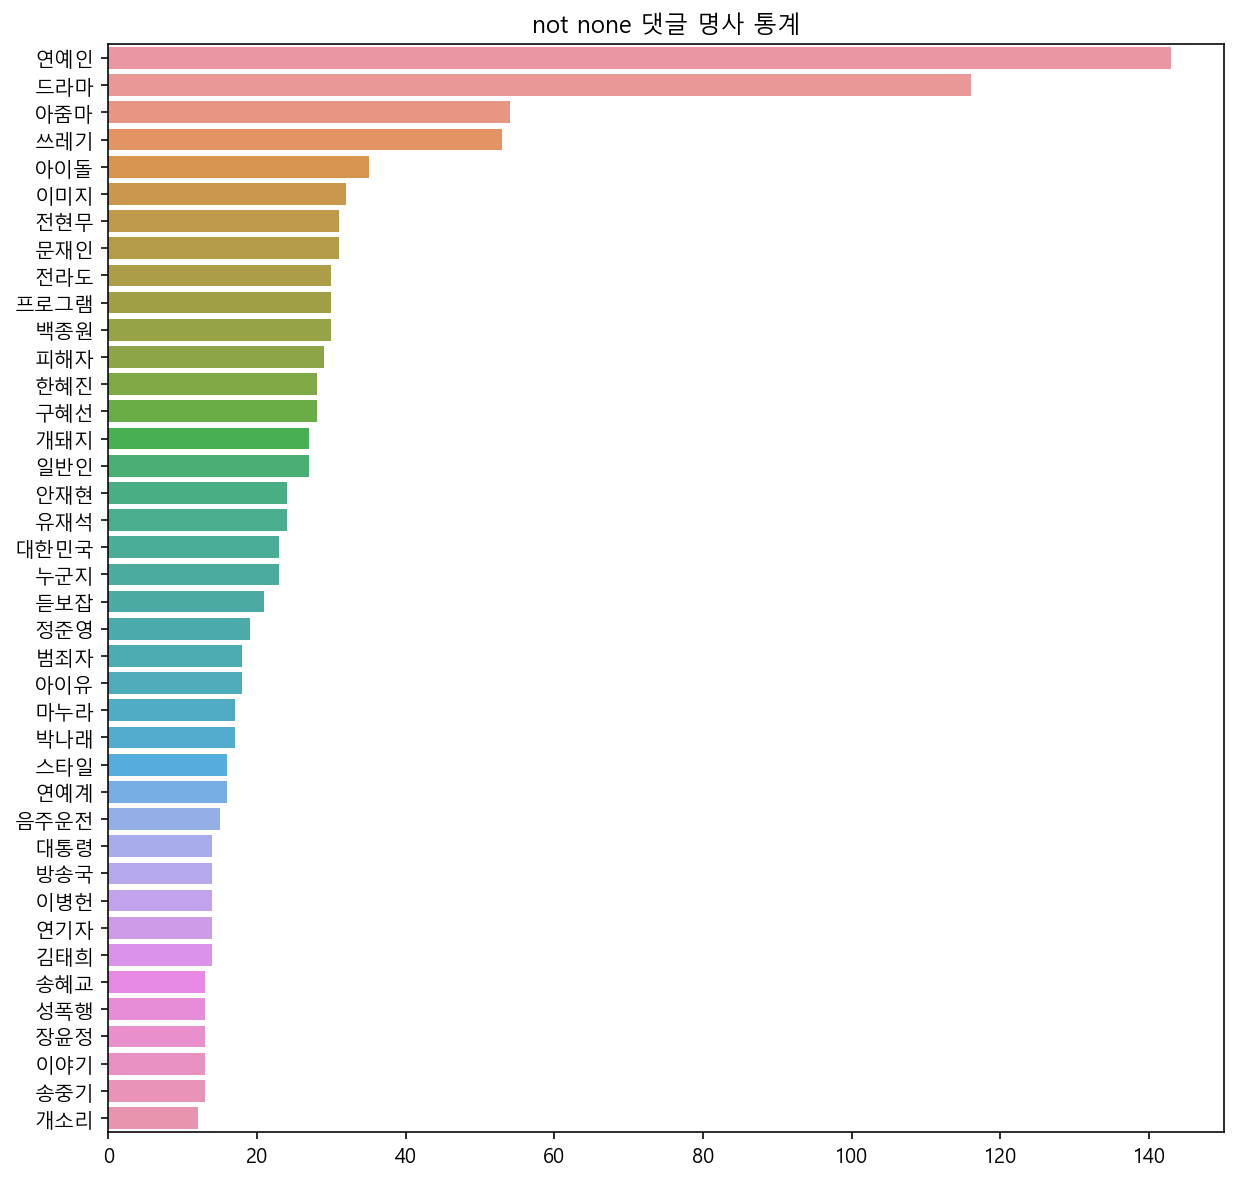

In [89]:
# total, none, not_none 순 확인
plt.figure(figsize=(10,10))
plt.title('전체 댓글 명사 통계')
sns.barplot(x=cr_c, y=cr)

plt.figure(figsize=(10,10))
plt.title('none 댓글 명사 통계')
sns.barplot(x=cr_none_c, y=cr_none)


plt.figure(figsize=(10,10))
plt.title('not none 댓글 명사 통계')
sns.barplot(x=cr_not_none_c, y=cr_not_none)
plt.show()

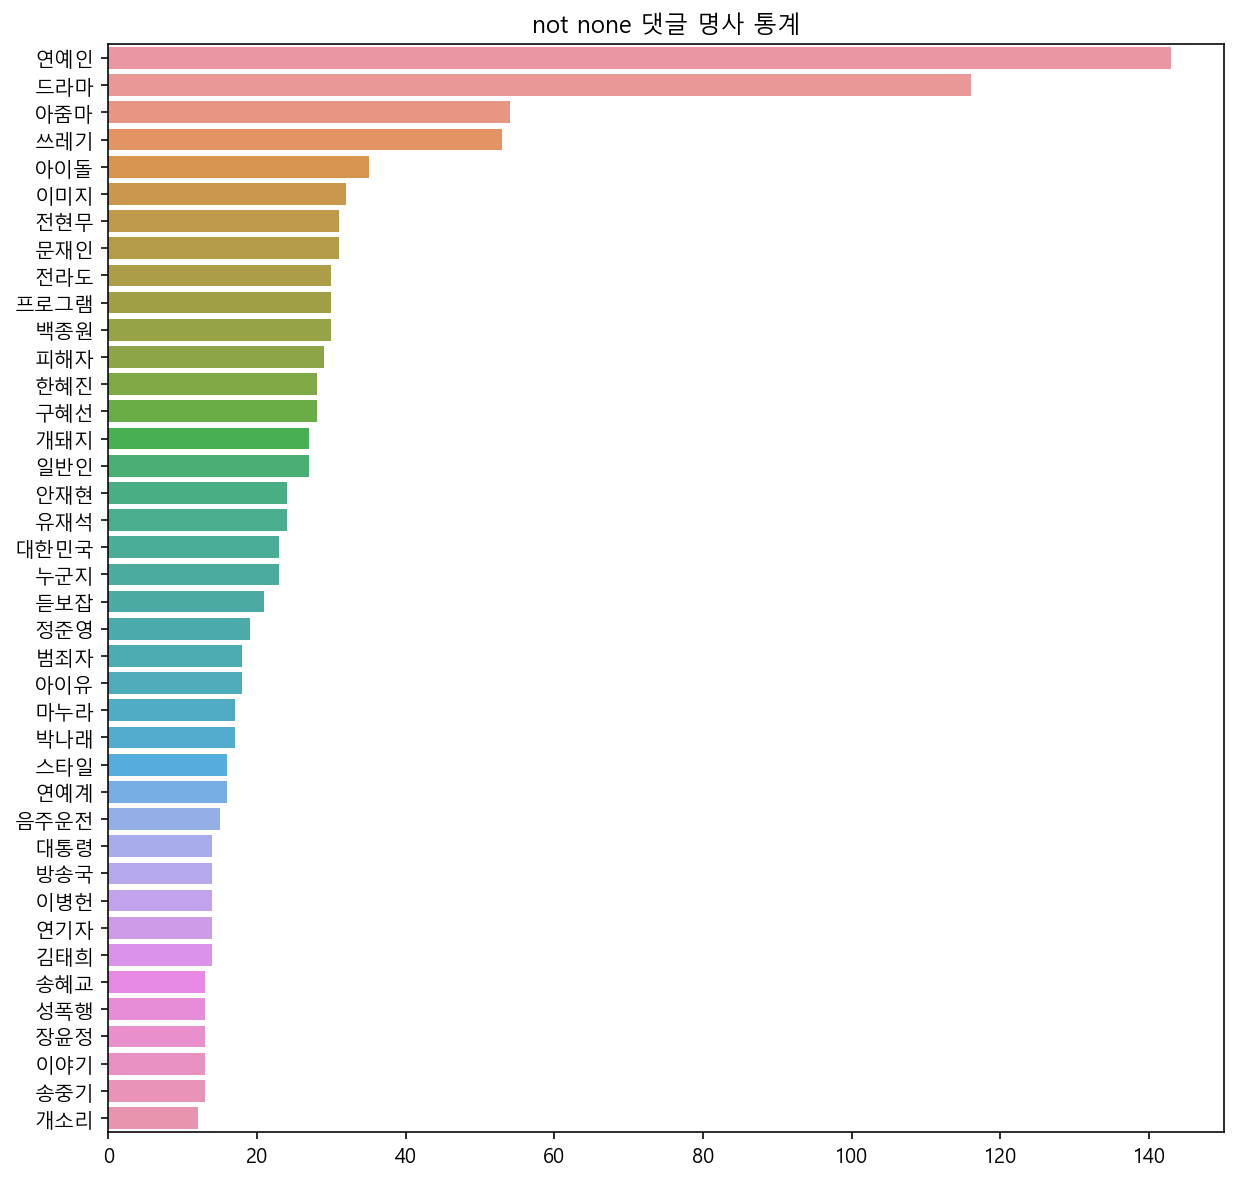

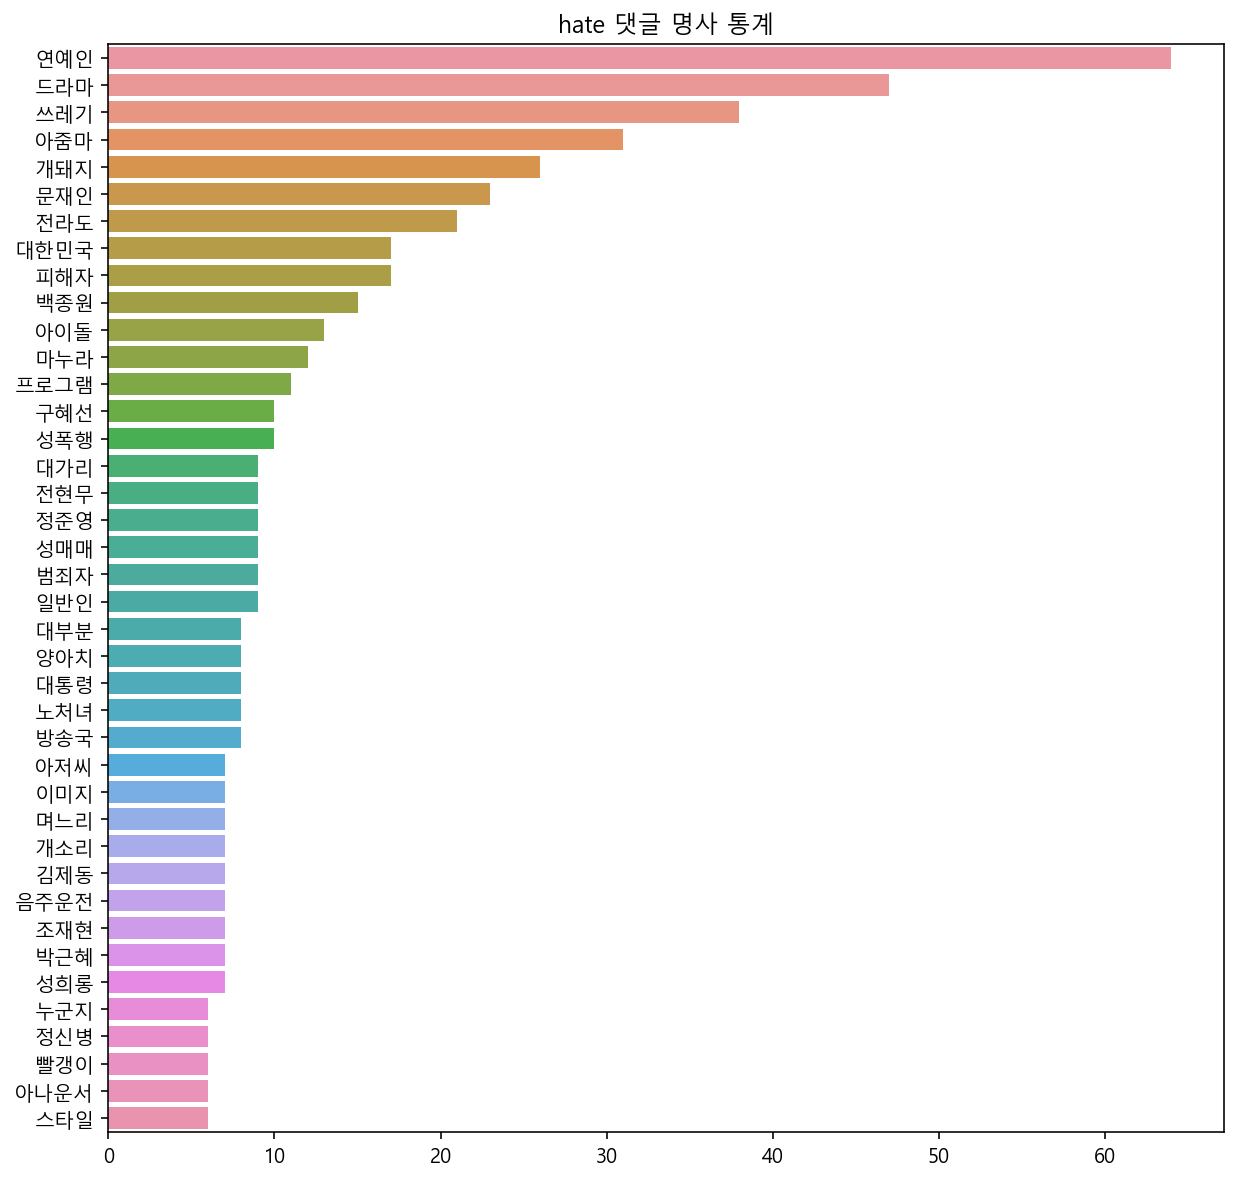

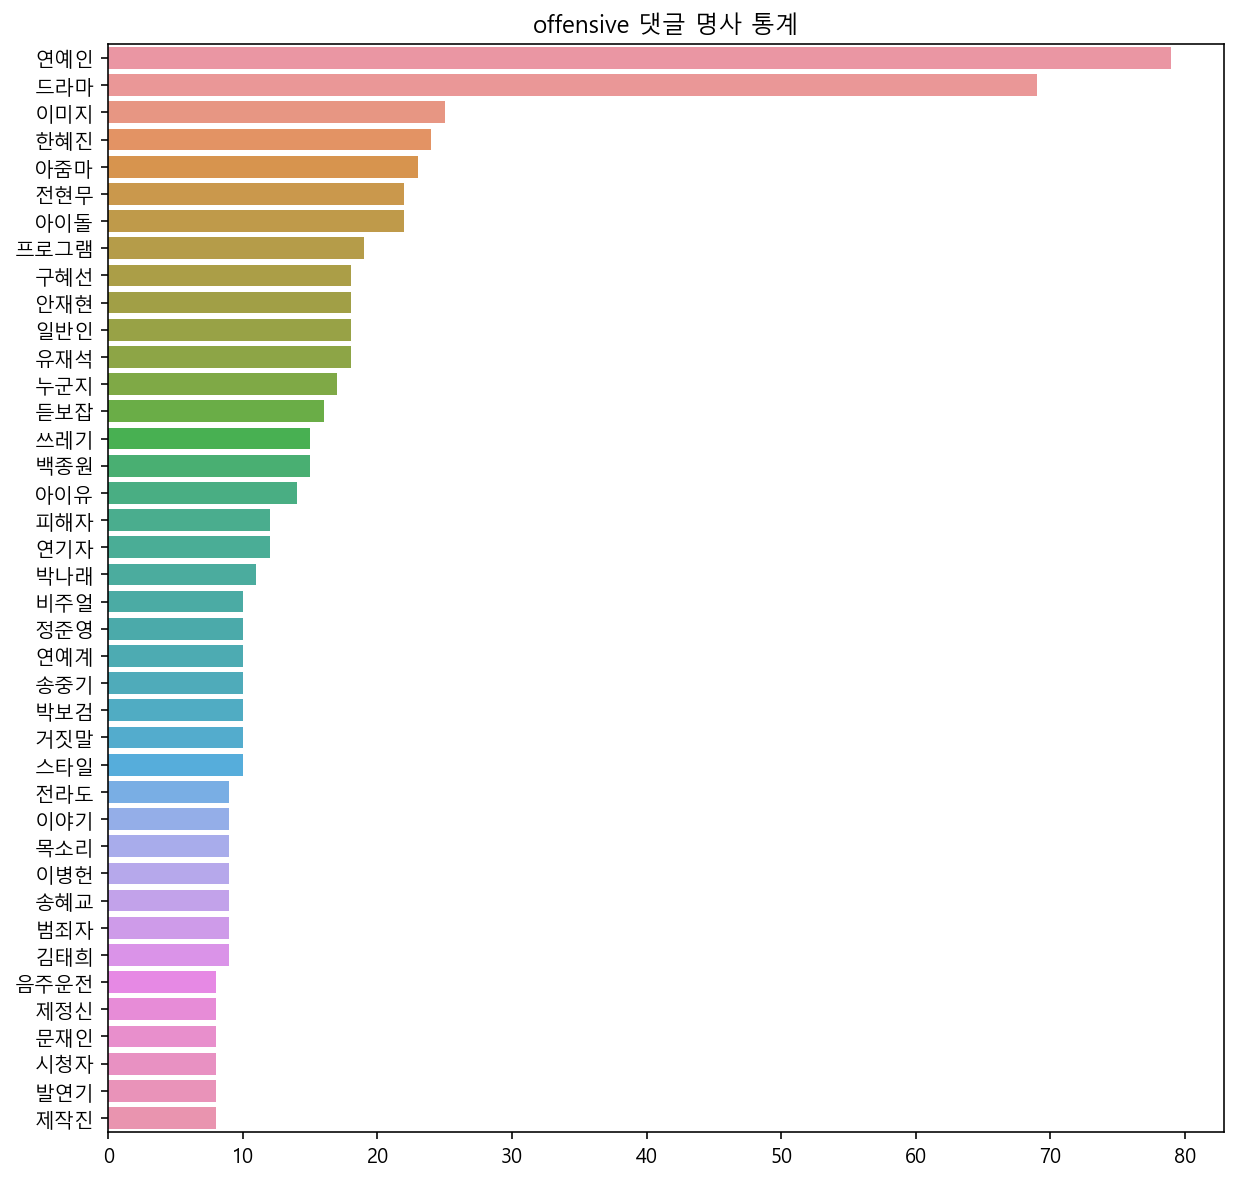

In [81]:
# 증오 댓글중 hate와 offensive 비교
plt.figure(figsize=(10,10))
plt.title('not none 댓글 명사 통계')
sns.barplot(x=cr_not_none_c, y=cr_not_none)

plt.figure(figsize=(10,10))
plt.title('hate 댓글 명사 통계')
sns.barplot(x=cr_hate_c, y=cr_hate)

plt.figure(figsize=(10,10))
plt.title('offensive 댓글 명사 통계')
sns.barplot(x=cr_offensive_c, y=cr_offensive)
plt.show()

In [90]:
ranking = pd.DataFrame()

ranking['total_w'] = cr
ranking['total_c'] = cr_c
ranking['none_w'] = cr_none
ranking['none_c'] = cr_none_c
ranking['not_none_w'] = cr_not_none
ranking['not_none_c'] = cr_not_none_c
ranking['hate_w'] = cr_hate
ranking['hate_c'] = cr_hate_c
ranking['offensive_w'] = cr_offensive
ranking['offensive_c'] = cr_offensive_c

ranking

,total_w,total_c,none_w,none_c,not_none_w,not_none_c,hate_w,hate_c,offensive_w,offensive_c
0,드라마,218,드라마,102,연예인,143,연예인,64,연예인,79
1,연예인,203,연예인,60,드라마,116,드라마,47,드라마,69
2,아줌마,59,화이팅,29,아줌마,54,쓰레기,38,이미지,25
3,쓰레기,57,목소리,21,쓰레기,53,아줌마,31,한혜진,24
4,이미지,52,이미지,20,아이돌,35,개돼지,26,아줌마,23
5,피해자,47,유재석,19,이미지,32,문재인,23,전현무,22
6,전현무,45,송혜교,19,전현무,31,전라도,21,아이돌,22
7,프로그램,44,피해자,18,문재인,31,대한민국,17,프로그램,19
8,백종원,43,송중기,16,전라도,30,피해자,17,구혜선,18
9,아이돌,43,누군지,16,프로그램,30,백종원,15,안재현,18
